In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import xgboost as xgb
from tensorflow.keras.layers import LeakyReLU
from sklearn.preprocessing import LabelEncoder

## SIMPLE EDA

In [ ]:

pd.set_option('display.max_columns', None)
data = pd.read_excel('/content/drive/My Drive/Colab Notebooks/iseng/DataDNA/September2025/Credit_Risk_Dataset_Onyx_Data_September_25.xlsx')

data.head(20)




,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0
5,CUST_00006,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,36,0.252525,2211.741134,0.475933,10,0.827034,0
6,CUST_00007,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3,Female,Widowed,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.453956,21503.495722,0.732860,15,0.190337,1
7,CUST_00008,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4,Female,Single,High School,Canada,Quebec,Quebec City,46.8139,-71.2080,Self-employed,36,0.443285,14338.761031,0.624889,6,0.850098,0
8,CUST_00009,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2,Female,Married,Master,USA,Texas,Dallas,32.7767,-96.7970,Part-time,24,0.421687,22017.859607,0.686962,10,0.876532,1
9,CUST_00010,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3,Male,Single,Bachelor,UK,Scotland,Glasgow,55.8642,-4.2518,Part-time,24,0.160000,1513.559984,0.311356,11,0.586626,0


Text(0.5, 1.0, 'Target distribution')

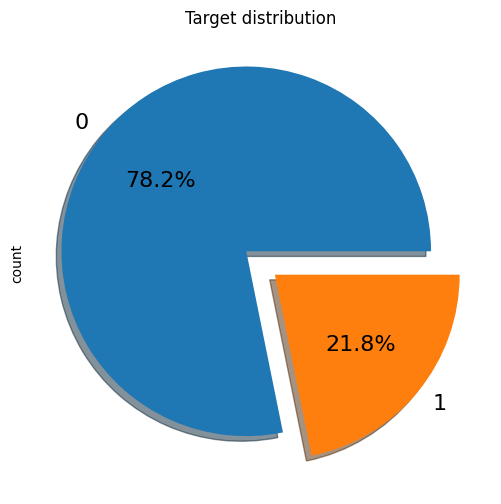

In [ ]:

plt.figure(figsize=(6,6))
counts = data['loan_status'].value_counts()
data['loan_status'].value_counts().plot.pie(explode=[0.1]*len(counts), autopct='%1.1f%%', shadow=True, textprops={'fontsize':16}).set_title("Target distribution")


In [ ]:
print("Unique Values per Column :")
print(data.nunique())

Unique Values per Column :
client_ID                     32581
person_age                       58
person_income                  4295
person_home_ownership             4
person_emp_length                36
loan_intent                       6
loan_grade                        7
loan_amnt                       753
loan_int_rate                   348
loan_status                       2
loan_percent_income              77
cb_person_default_on_file         2
cb_person_cred_hist_length       29
gender                            2
marital_status                    4
education_level                   4
country                           3
state                             9
city                             18
city_latitude                    18
city_longitude                   18
employment_type                   4
loan_term_months                  4
loan_to_income_ratio           9914
other_debt                    32581
debt_to_income_ratio          32581
open_accounts                    16
c

In [ ]:
data.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
1,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
2,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
3,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
4,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0


In [ ]:
#MISSING VALUE

print ("Missing Values : ")
print (data.isnull().sum())
print ("------------------------------")
print ("Duplicate Values : ", str(data.duplicated().sum()))



Missing Values : 
client_ID                        0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
gender                           0
marital_status                   0
education_level                  0
country                          0
state                            0
city                             0
city_latitude                    0
city_longitude                   0
employment_type                  0
loan_term_months                 0
loan_to_income_ratio             0
other_debt                       0
debt_to_income_ratio             0
open_accounts                    0
credit_utilization_ratio         0
pa

## OUTLIER and handle person_emp_length missing value


In [ ]:
data[data['person_emp_length'].isnull()].head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
105,CUST_00106,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4,Male,Single,High School,Canada,BC,Victoria,48.4284,-123.3656,Full-time,60,0.158730,674.849776,0.212290,10,0.666095,0
222,CUST_00223,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2,Male,Married,Bachelor,USA,New York,New York City,40.7128,-74.0060,Full-time,36,0.189189,41005.631813,0.410841,7,0.065828,1
379,CUST_00380,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3,Female,Divorced,Bachelor,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,60,0.232143,4419.464820,0.495206,8,0.317163,1
407,CUST_00408,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2,Male,Single,Master,UK,Scotland,Edinburgh,55.9533,-3.1883,Full-time,36,0.461538,10701.382537,0.667334,3,0.866820,0
408,CUST_00409,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3,Male,Married,Bachelor,Canada,Ontario,Ottawa,45.4215,-75.6972,Part-time,36,0.129668,2510.924365,0.274373,1,0.502284,1


In [ ]:
data_backup_with_outlier = data.copy()

In [ ]:
data = data_backup_with_outlier.copy()

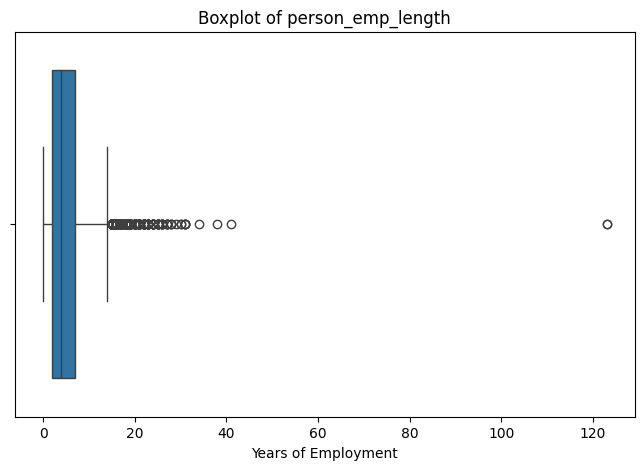

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['person_emp_length'])
plt.title('Boxplot of person_emp_length')
plt.xlabel('Years of Employment')
plt.show()

In [ ]:

invalid_emp_length = data[data['person_age'] < data['person_emp_length']]

print("num row with person_age < person_emp_length:", len(invalid_emp_length))
invalid_emp_length.head()


Jumlah baris dengan person_age < person_emp_length: 2


,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00001,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3,Male,Married,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,36,0.593220,8402.453850,0.735635,14,0.495557,0
210,CUST_00211,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4,Male,Single,High School,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.104167,32653.092506,0.274235,6,0.482647,1


In [ ]:
data = data[(data['person_emp_length'].isna()) | (data['person_emp_length'] <= data['person_age'])]


handle missing value

In [ ]:

missing_emp_length = data[data['person_emp_length'].isna()]

median_age_missing = missing_emp_length['person_age'].median()

print("Median person_age for row with missing person_emp_length:", median_age_missing)


Median person_age untuk baris dengan missing person_emp_length: 25.0


In [ ]:

age_25 = data[(data['person_age'] == 25) & (data['person_emp_length'].notna())]
median_emp_length_age_25 = age_25['person_emp_length'].median()

print("Median person_emp_length for person_age 25:", median_emp_length_age_25)


Median person_emp_length untuk person_age 25: 4.0


In [ ]:

median_by_categories = age_25.groupby(
    ['employment_type', 'education_level', 'loan_grade', 'loan_intent']
)['person_emp_length'].median().reset_index()

median_by_categories.head()


,employment_type,education_level,loan_grade,loan_intent,person_emp_length
0,Full-time,Bachelor,A,DEBTCONSOLIDATION,5.0
1,Full-time,Bachelor,A,EDUCATION,4.0
2,Full-time,Bachelor,A,HOMEIMPROVEMENT,6.0
3,Full-time,Bachelor,A,MEDICAL,6.0
4,Full-time,Bachelor,A,PERSONAL,4.0


In [ ]:

cols_group = ['person_age', 'employment_type', 'education_level', 'loan_grade', 'loan_intent']

median_emp_length = data.groupby(cols_group)['person_emp_length'].median().reset_index()
median_emp_length = median_emp_length.rename(columns={'person_emp_length': 'median_emp_length'})

data = data.merge(median_emp_length, on=cols_group, how='left')


data['person_emp_length'] = data['person_emp_length'].fillna(data['median_emp_length'])
data['person_emp_length'] = data['person_emp_length'].fillna(4.0)
data = data.drop(columns=['median_emp_length'])


In [ ]:

cols_group = ['person_age', 'employment_type', 'education_level', 'loan_grade', 'loan_intent']

median_emp_length = data.groupby(cols_group)['person_emp_length'].median().reset_index()
median_emp_length = median_emp_length.rename(columns={'person_emp_length': 'median_emp_length'})


data = data.merge(median_emp_length, on=cols_group, how='left')


data['person_emp_length'] = data['person_emp_length'].fillna(data['median_emp_length'])
data['person_emp_length'] = data['person_emp_length'].fillna(4.0)

data = data.drop(columns=['median_emp_length'])


In [ ]:
# print (data.isnull().sum())

In [ ]:
data_backup_without_outlier = data.copy()

In [ ]:
data = data_backup_without_outlier.copy()

## LOAN INT RATE MISSING VALUE HANDLE

In [ ]:
data[data['loan_int_rate'].isnull()].head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
38,CUST_00040,23,71500,RENT,3.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.42,N,4,Male,Married,High School,USA,New York,Buffalo,42.8864,-78.8784,Self-employed,60,0.419580,10969.320424,0.572997,3,0.633212,1
49,CUST_00051,24,78000,RENT,4.0,DEBTCONSOLIDATION,D,30000,NaN,1,0.38,Y,4,Female,Single,Master,USA,Texas,Houston,29.7604,-95.3698,Full-time,24,0.384615,12106.049039,0.539821,7,0.523438,0
56,CUST_00058,23,277000,OWN,3.0,PERSONAL,A,35000,NaN,0,0.13,N,4,Male,Single,Bachelor,USA,New York,New York City,40.7128,-74.0060,Full-time,36,0.126354,73129.330642,0.390359,4,0.454316,0
58,CUST_00060,24,12000,OWN,2.0,VENTURE,E,1750,NaN,0,0.15,Y,3,Male,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Self-employed,36,0.145833,2467.213396,0.351434,1,0.647044,1
61,CUST_00063,26,263000,MORTGAGE,0.0,EDUCATION,B,10000,NaN,1,0.04,N,4,Female,Single,Bachelor,UK,England,London,51.5074,-0.1278,Full-time,60,0.038023,63598.548710,0.279842,13,0.944370,0


In [ ]:
data.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
0,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3
1,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0
2,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0
3,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0
4,CUST_00006,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,36,0.252525,2211.741134,0.475933,10,0.827034,0


In [ ]:
# data['loan_int_rate_missing'] = data['loan_int_rate'].isna()


In [ ]:
cols_group = ['loan_grade', 'loan_intent', 'employment_type']
data['loan_int_rate'] = data['loan_int_rate'].fillna(
    data.groupby(cols_group)['loan_int_rate'].transform('mean')
)


In [ ]:
data = data.dropna(subset=['loan_int_rate'])

In [ ]:
#MISSING VALUE

print ("Missing Values : ")
print (data.isnull().sum())
print ("------------------------------")
print ("Duplicate Values : ", str(data.duplicated().sum()))



Missing Values : 
client_ID                     0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
gender                        0
marital_status                0
education_level               0
country                       0
state                         0
city                          0
city_latitude                 0
city_longitude                0
employment_type               0
loan_term_months              0
loan_to_income_ratio          0
other_debt                    0
debt_to_income_ratio          0
open_accounts                 0
credit_utilization_ratio      0
past_delinquencies            0
dtype: int64
------------------------------
Duplicate 

In [ ]:
data_final_imputate = data.copy()

In [ ]:
data = data_final_imputate.copy()

## See which groups of borrowers are more or less likely to default

In [ ]:
cat_col = []
num_col = []

for i in data.columns:
    dtype_str = str(data[i].dtype)
    if 'int' in dtype_str or 'float' in dtype_str:
        num_col.append(i)
    else:
        cat_col.append(i)

print("Numerik:", num_col)
print("Kategorikal:", cat_col)


Numerik: ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income', 'cb_person_cred_hist_length', 'city_latitude', 'city_longitude', 'loan_term_months', 'loan_to_income_ratio', 'other_debt', 'debt_to_income_ratio', 'open_accounts', 'credit_utilization_ratio', 'past_delinquencies']
Kategorikal: ['client_ID', 'person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'gender', 'marital_status', 'education_level', 'country', 'state', 'city', 'employment_type']


In [ ]:
data = data.drop(columns=['loan_percent_income'],errors='ignore')

In [ ]:
data.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,city_latitude,city_longitude,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies
count,32578.000000,3.257800e+04,32578.000000,32578.000000,32578.000000,32578.000000,32578.000000,32578.000000,32578.000000,32578.000000,32578.000000,3.257800e+04,32578.000000,32578.000000,32578.000000,32578.000000
mean,27.735005,6.607179e+04,4.770121,9588.328013,11.009701,0.218123,5.804316,45.407155,-63.808660,38.501811,0.170543,1.156746e+04,0.345198,8.041807,0.499881,0.505126
std,6.348180,6.198194e+04,3.997442,6320.538558,3.219335,0.412977,4.055140,7.644858,46.615298,16.013160,0.107028,1.306100e+04,0.129394,4.328114,0.259541,0.711761
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,29.760400,-123.365600,12.000000,0.000789,2.252074e+02,0.064502,0.000000,0.050001,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.880000,0.000000,3.000000,40.712800,-96.797000,24.000000,0.089601,5.386634e+03,0.251234,4.000000,0.275343,0.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990050,0.000000,4.000000,46.813900,-75.697200,36.000000,0.148148,8.994982e+03,0.333181,8.000000,0.500291,0.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.466108,0.000000,8.000000,51.507400,-3.943600,60.000000,0.229167,1.456222e+04,0.423138,12.000000,0.725060,1.000000
max,144.000000,6.000000e+06,41.000000,35000.000000,23.220000,1.000000,30.000000,55.953300,-0.127800,60.000000,0.830000,1.187999e+06,1.053888,15.000000,0.949998,6.000000


In [ ]:
data = data[data['person_age'] <= 100]

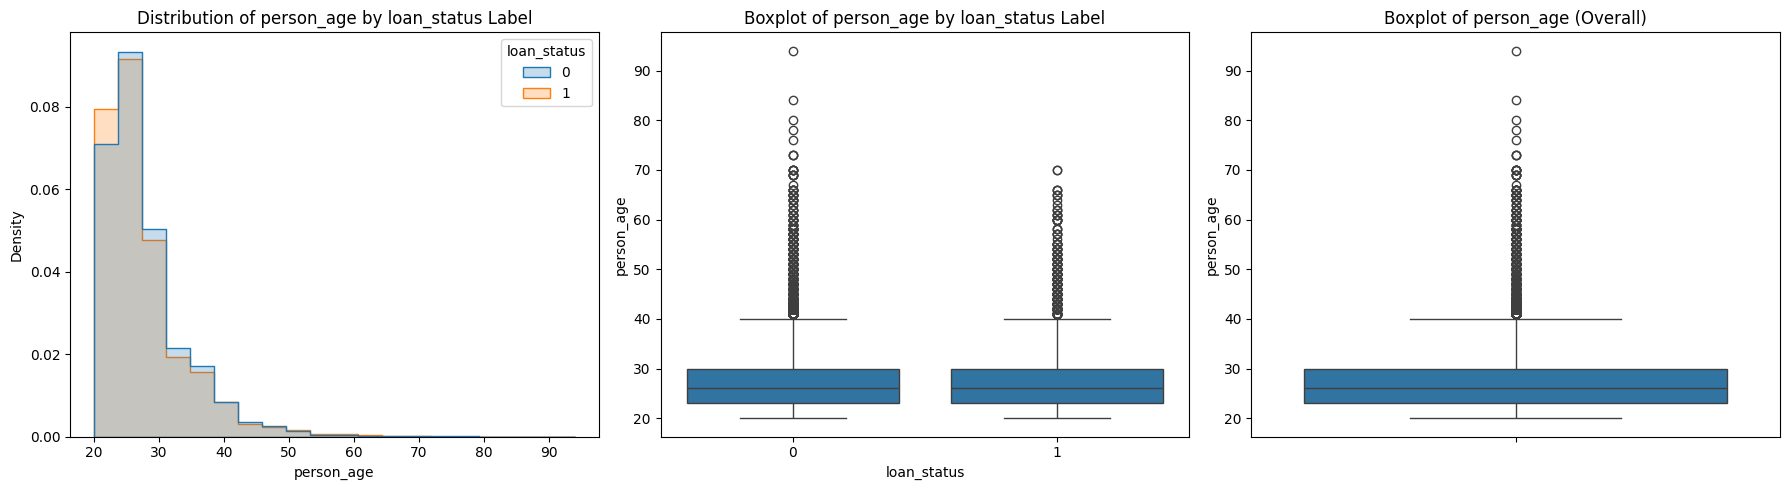

Distribution for person_age:
  loan_status = 0: Skewness = 1.9347, Kurtosis = 5.9834
  loan_status = 1: Skewness = 1.9866, Kurtosis = 5.5577
-----------------------------------------


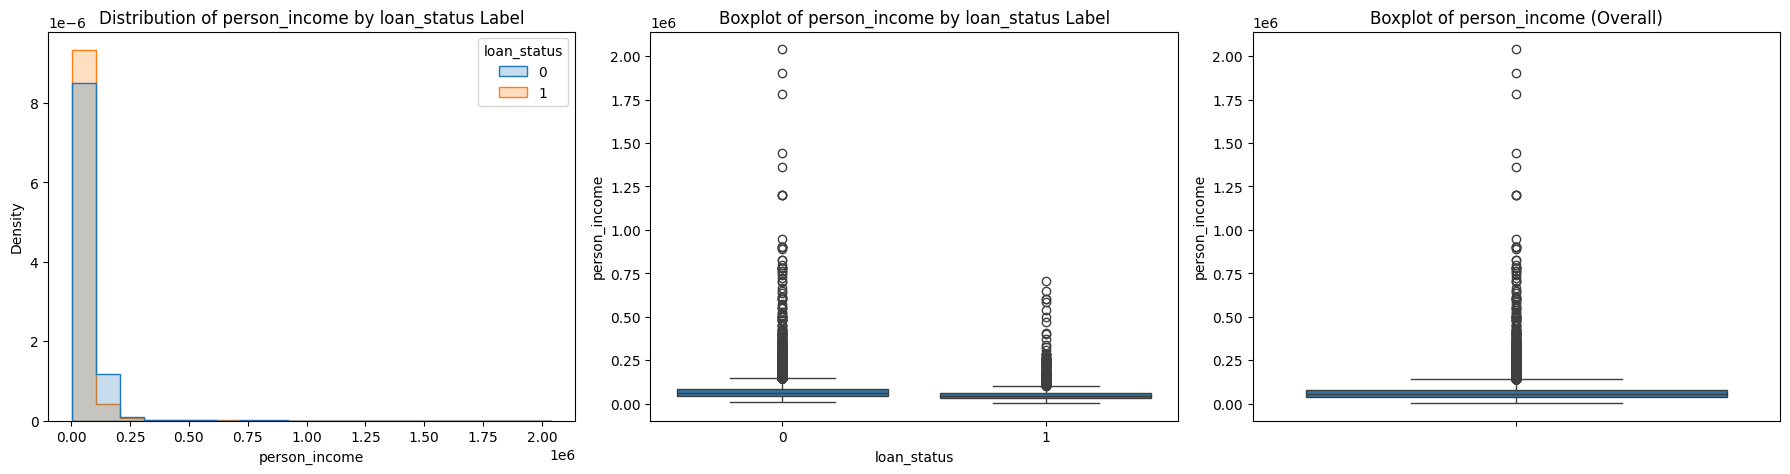

Distribution for person_income:
  loan_status = 0: Skewness = 10.1541, Kurtosis = 229.2600
  loan_status = 1: Skewness = 5.4704, Kurtosis = 62.1182
-----------------------------------------


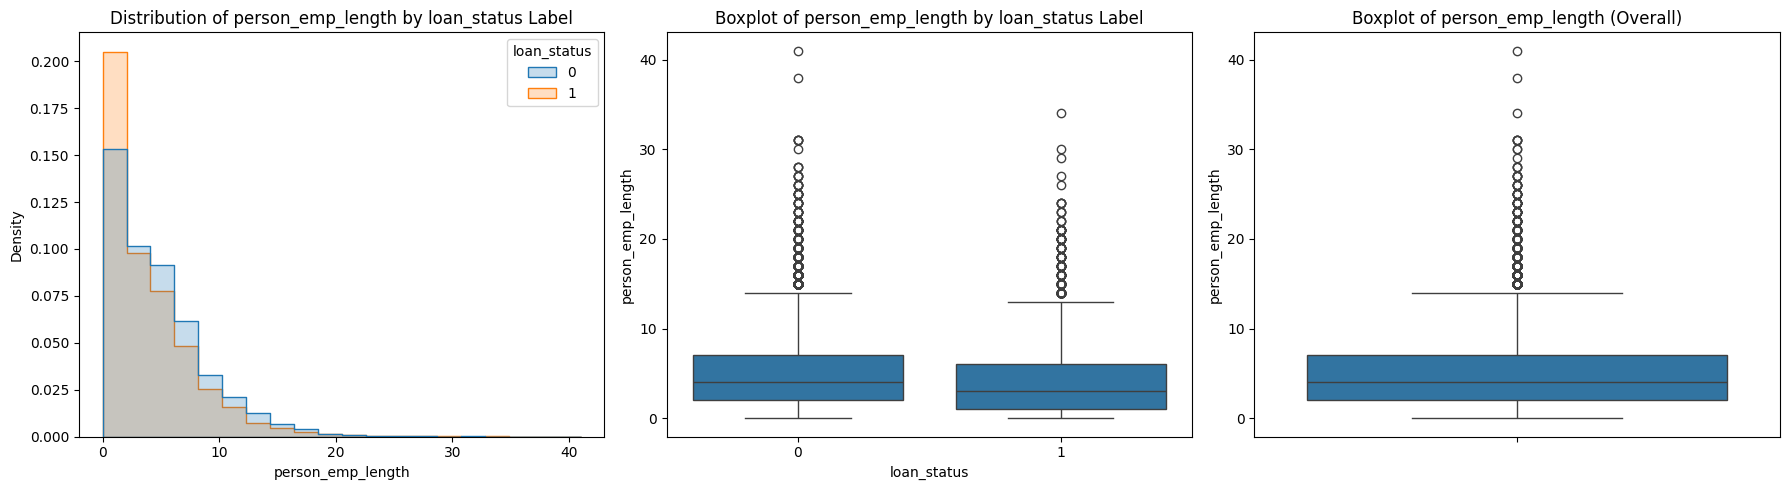

Distribution for person_emp_length:
  loan_status = 0: Skewness = 1.2146, Kurtosis = 2.3427
  loan_status = 1: Skewness = 1.4989, Kurtosis = 3.5270
-----------------------------------------


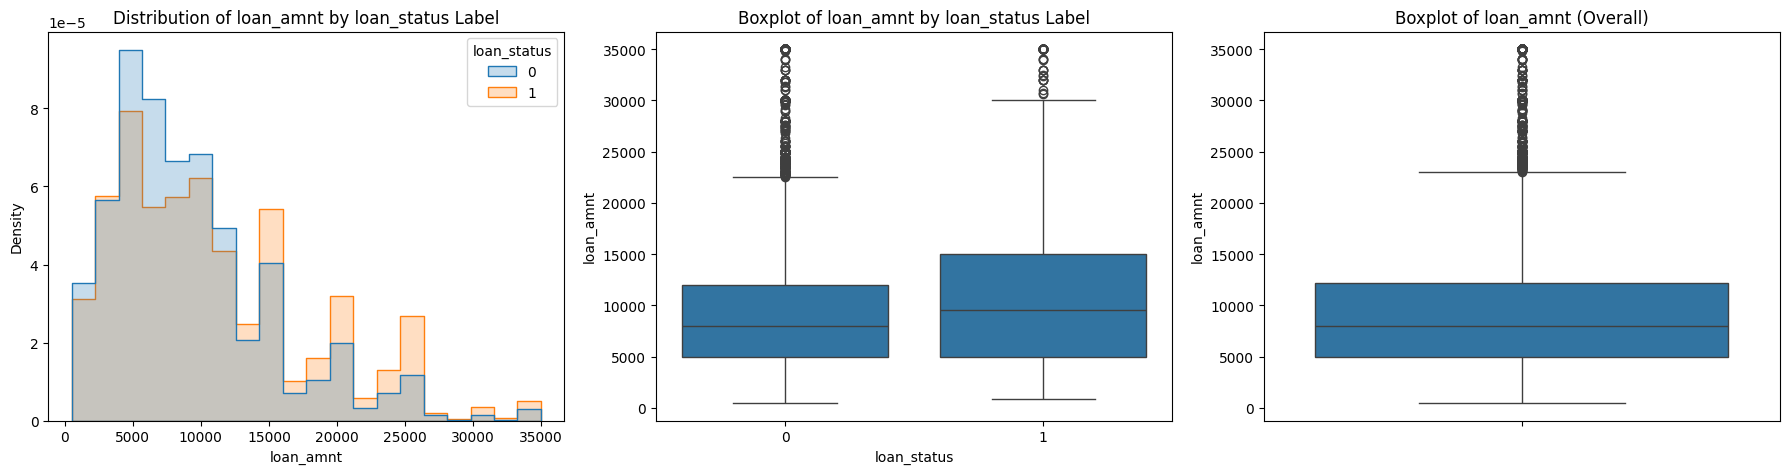

Distribution for loan_amnt:
  loan_status = 0: Skewness = 1.2704, Kurtosis = 1.8464
  loan_status = 1: Skewness = 0.8970, Kurtosis = 0.3205
-----------------------------------------


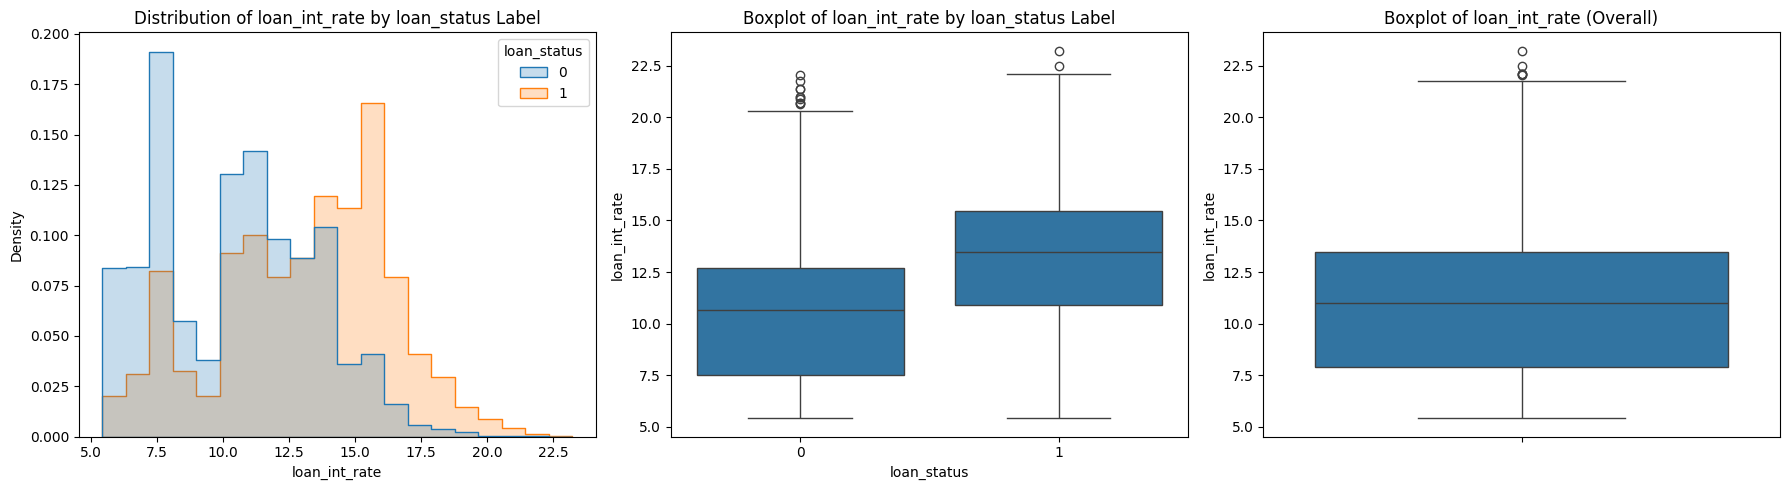

Distribution for loan_int_rate:
  loan_status = 0: Skewness = 0.2335, Kurtosis = -0.6936
  loan_status = 1: Skewness = -0.2626, Kurtosis = -0.5301
-----------------------------------------


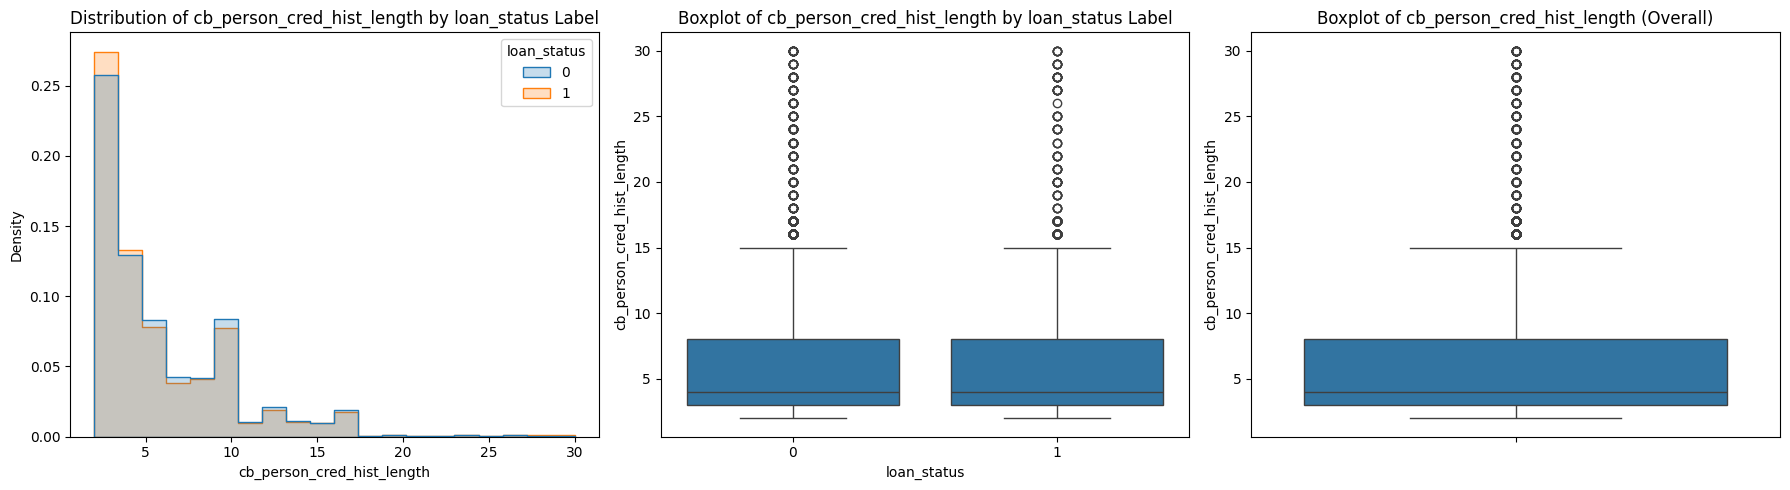

Distribution for cb_person_cred_hist_length:
  loan_status = 0: Skewness = 1.6156, Kurtosis = 3.4720
  loan_status = 1: Skewness = 1.8190, Kurtosis = 4.5482
-----------------------------------------


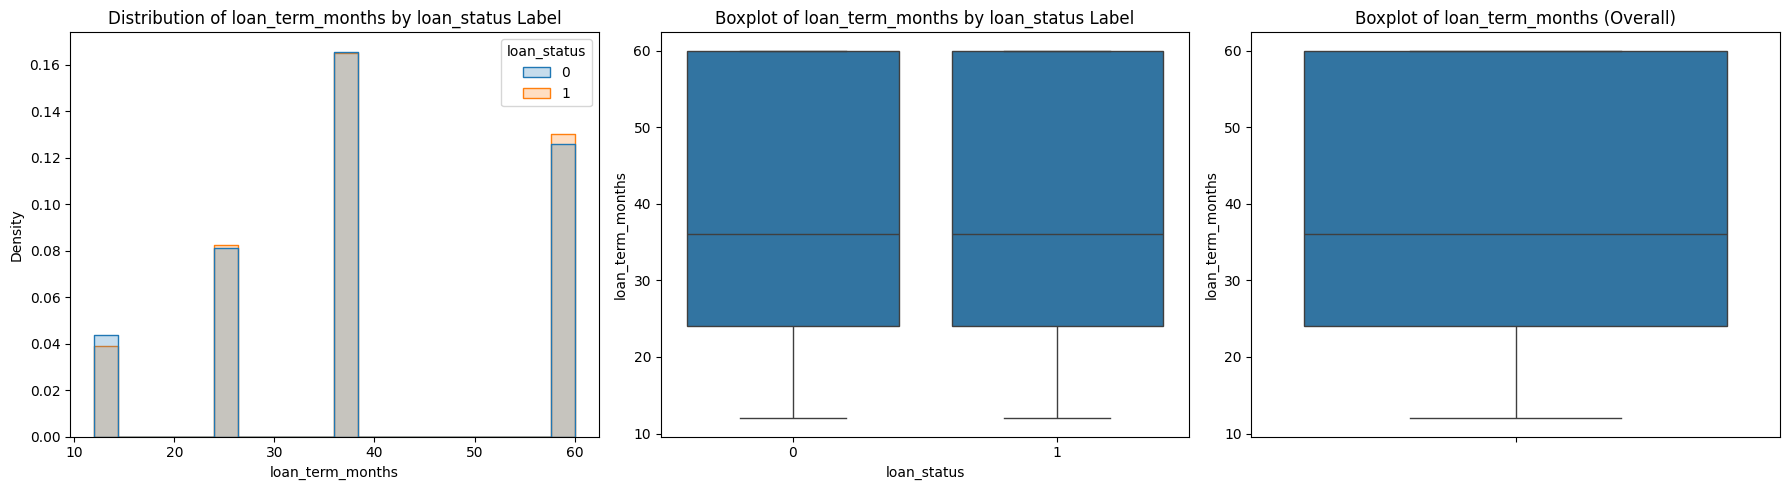

Distribution for loan_term_months:
  loan_status = 0: Skewness = 0.1281, Kurtosis = -1.1043
  loan_status = 1: Skewness = 0.1164, Kurtosis = -1.1284
-----------------------------------------


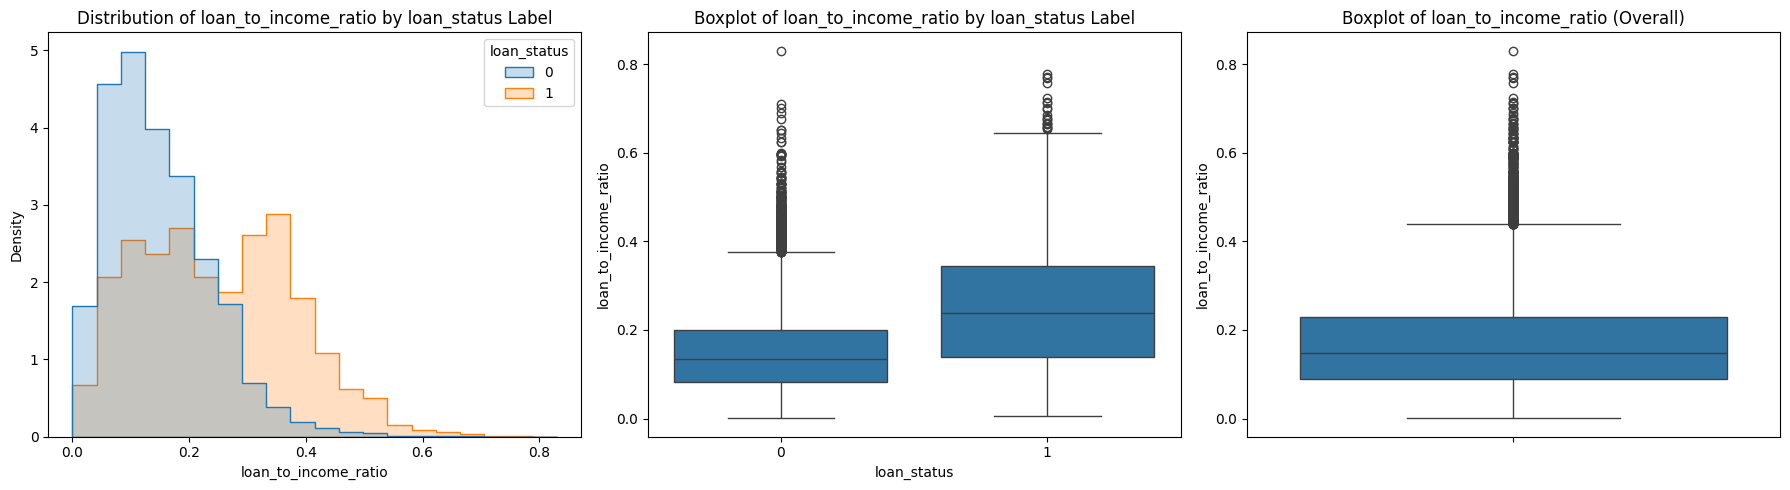

Distribution for loan_to_income_ratio:
  loan_status = 0: Skewness = 1.0291, Kurtosis = 1.6831
  loan_status = 1: Skewness = 0.3425, Kurtosis = -0.4641
-----------------------------------------


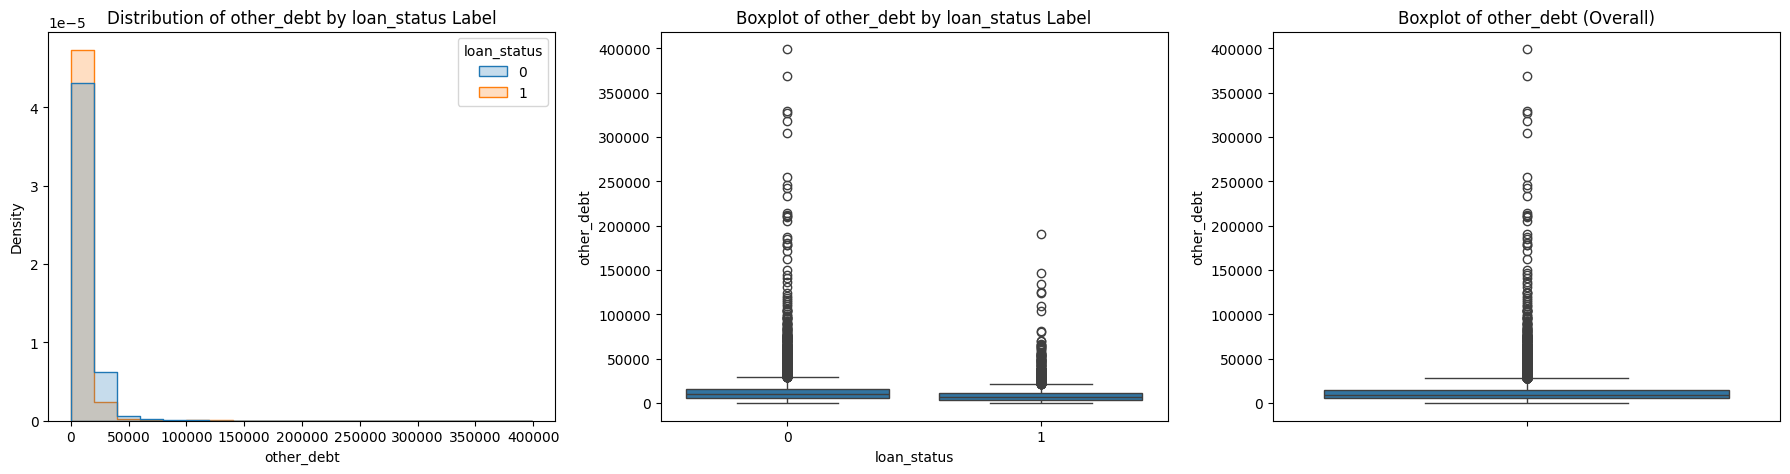

Distribution for other_debt:
  loan_status = 0: Skewness = 9.5045, Kurtosis = 199.3083
  loan_status = 1: Skewness = 5.9525, Kurtosis = 79.8320
-----------------------------------------


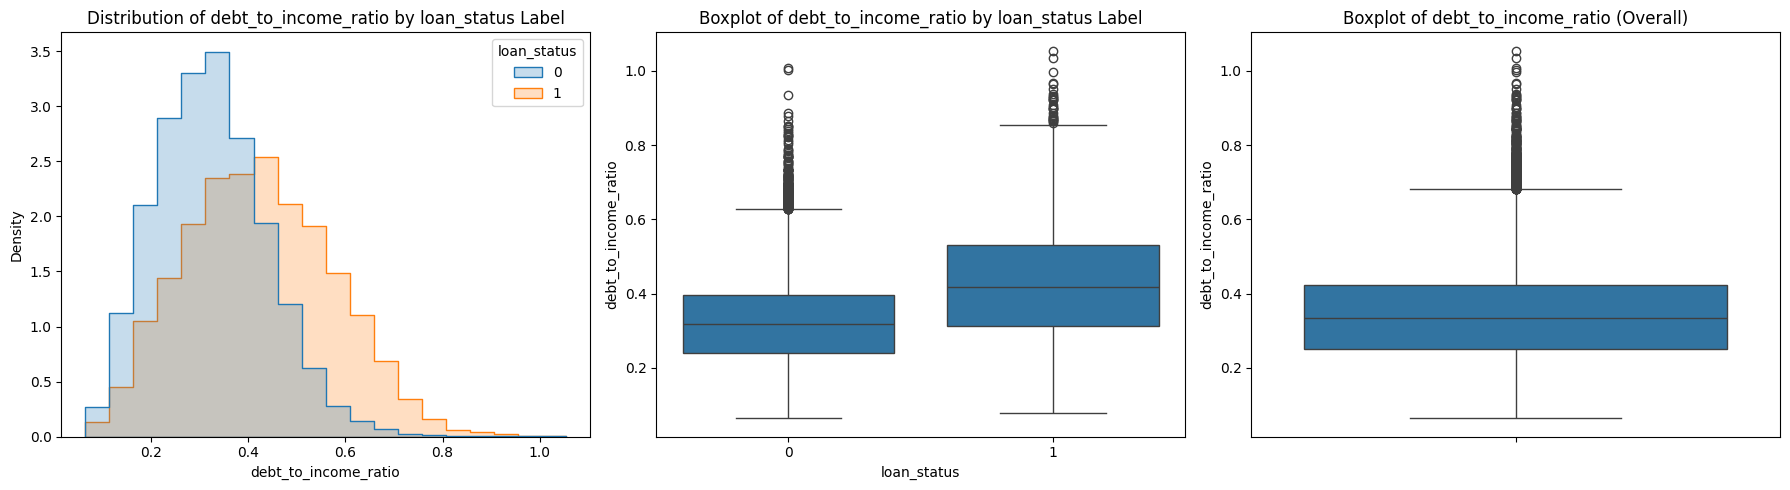

Distribution for debt_to_income_ratio:
  loan_status = 0: Skewness = 0.4726, Kurtosis = 0.3771
  loan_status = 1: Skewness = 0.2595, Kurtosis = -0.2485
-----------------------------------------


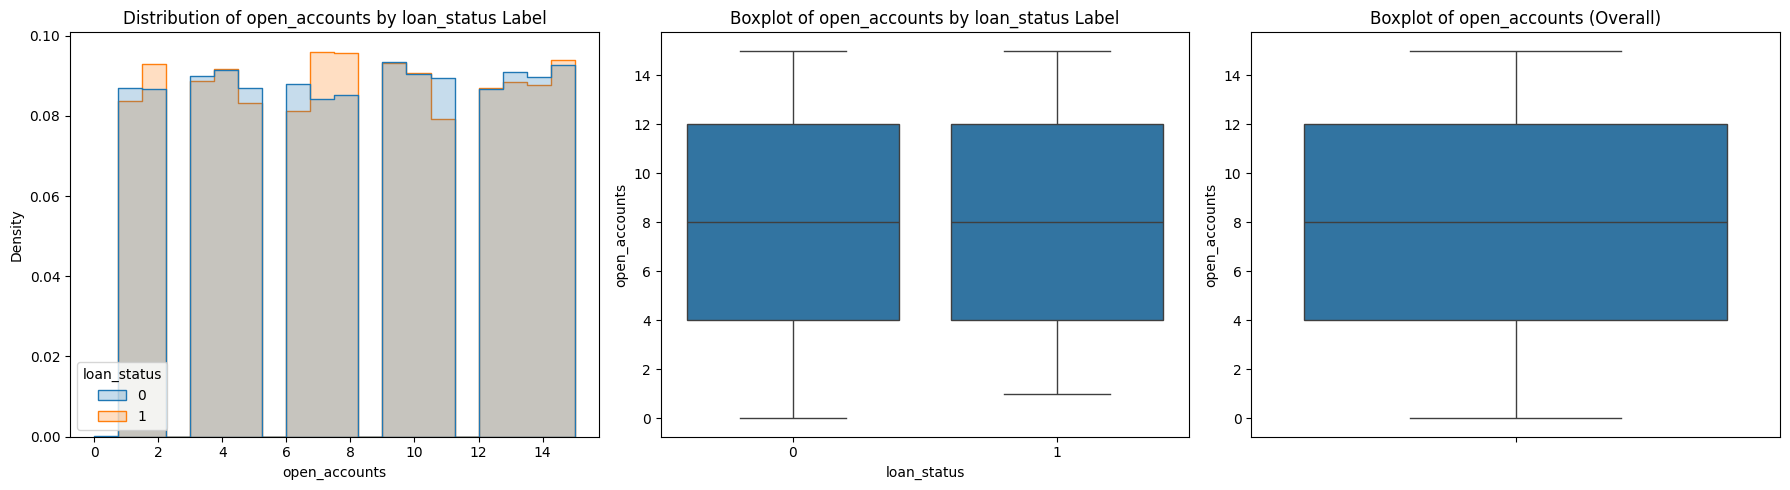

Distribution for open_accounts:
  loan_status = 0: Skewness = -0.0108, Kurtosis = -1.2179
  loan_status = 1: Skewness = 0.0063, Kurtosis = -1.1987
-----------------------------------------


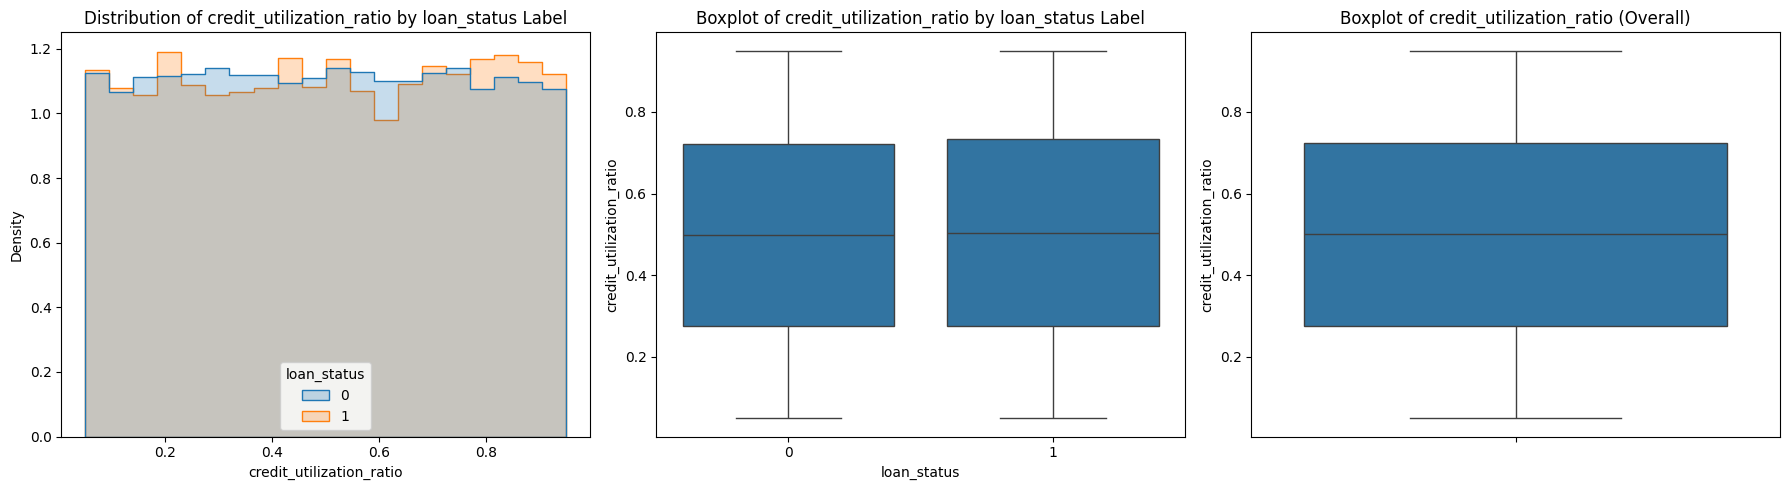

Distribution for credit_utilization_ratio:
  loan_status = 0: Skewness = 0.0038, Kurtosis = -1.1942
  loan_status = 1: Skewness = -0.0140, Kurtosis = -1.2152
-----------------------------------------


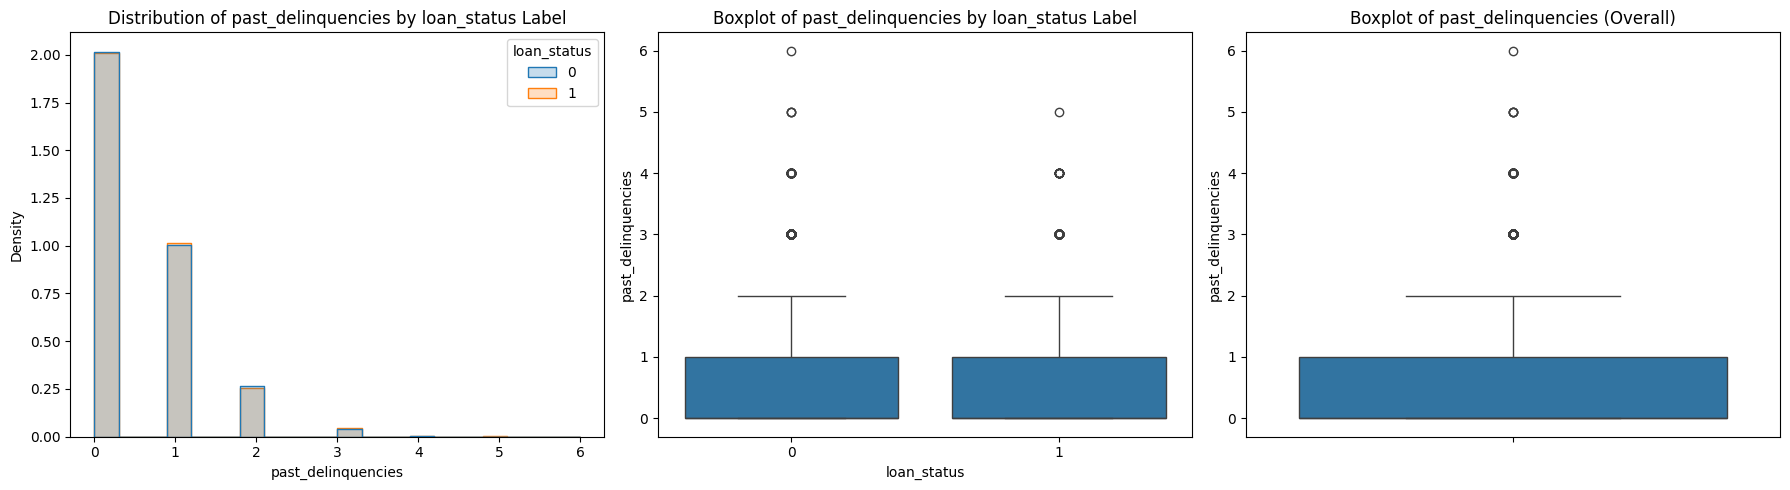

Distribution for past_delinquencies:
  loan_status = 0: Skewness = 1.3957, Kurtosis = 1.9111
  loan_status = 1: Skewness = 1.4035, Kurtosis = 1.9233
-----------------------------------------


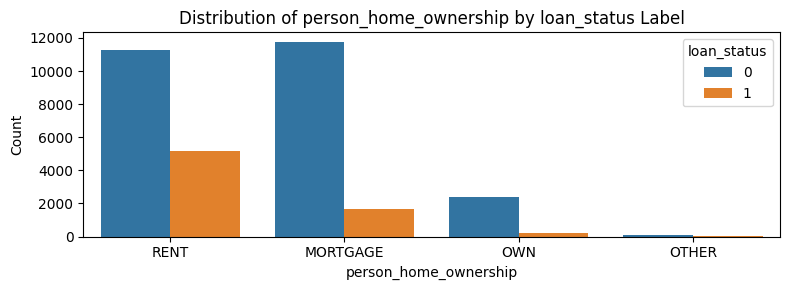


Overall distribution of person_home_ownership:
person_home_ownership
RENT        50.477389
MORTGAGE    41.261167
OWN          7.932951
OTHER        0.328493
Name: proportion, dtype: float64

Distribution of person_home_ownership for loan_status = 0:
person_home_ownership
MORTGAGE    46.142066
RENT        44.178741
OWN          9.388621
OTHER        0.290572
Name: proportion, dtype: float64

Distribution of person_home_ownership for loan_status = 1:
person_home_ownership
RENT        73.050943
MORTGAGE    23.768646
OWN          2.716015
OTHER        0.464396
Name: proportion, dtype: float64
--------------------------------------------


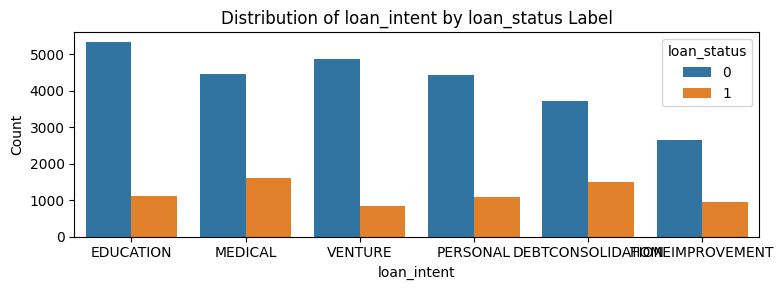


Overall distribution of loan_intent:
loan_intent
EDUCATION            19.804746
MEDICAL              18.638136
VENTURE              17.548276
PERSONAL             16.943481
DEBTCONSOLIDATION    15.997912
HOMEIMPROVEMENT      11.067449
Name: proportion, dtype: float64

Distribution of loan_intent for loan_status = 0:
loan_intent
EDUCATION            20.968312
VENTURE              19.118860
MEDICAL              17.473593
PERSONAL             17.363647
DEBTCONSOLIDATION    14.614992
HOMEIMPROVEMENT      10.460596
Name: proportion, dtype: float64

Distribution of loan_intent for loan_status = 1:
loan_intent
MEDICAL              22.811708
DEBTCONSOLIDATION    20.954123
EDUCATION            15.634675
PERSONAL             15.437658
HOMEIMPROVEMENT      13.242330
VENTURE              11.919505
Name: proportion, dtype: float64
--------------------------------------------


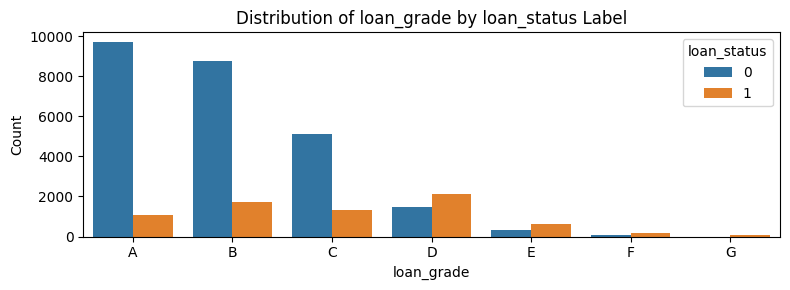


Overall distribution of loan_grade:
loan_grade
A    33.082614
B    32.075645
C    19.820096
D    11.128849
E     2.959506
F     0.739877
G     0.193412
Name: proportion, dtype: float64

Distribution of loan_grade for loan_status = 0:
loan_grade
A    38.100287
B    34.346409
C    20.092669
D     5.831076
E     1.346841
F     0.278792
G     0.003927
Name: proportion, dtype: float64

Distribution of loan_grade for loan_status = 1:
loan_grade
D    30.115395
B    23.937518
C    18.843231
A    15.099916
E     8.739094
F     2.392344
G     0.872502
Name: proportion, dtype: float64
--------------------------------------------


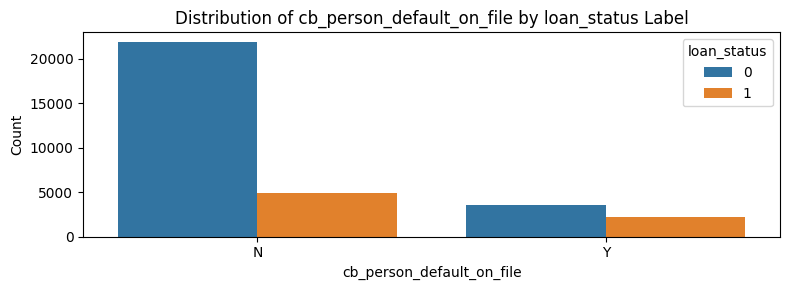


Overall distribution of cb_person_default_on_file:
cb_person_default_on_file
N    82.365763
Y    17.634237
Name: proportion, dtype: float64

Distribution of cb_person_default_on_file for loan_status = 0:
cb_person_default_on_file
N    85.970079
Y    14.029921
Name: proportion, dtype: float64

Distribution of cb_person_default_on_file for loan_status = 1:
cb_person_default_on_file
N    69.448354
Y    30.551646
Name: proportion, dtype: float64
--------------------------------------------


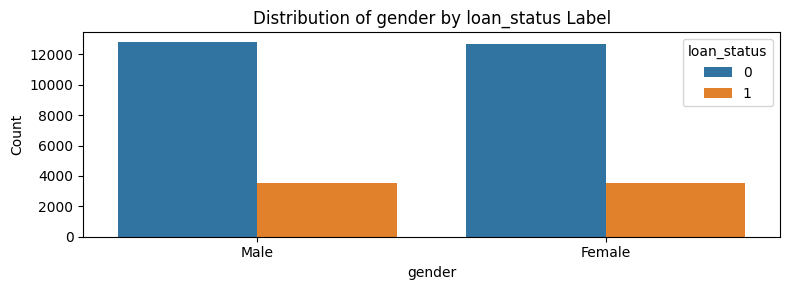


Overall distribution of gender:
gender
Male      50.240997
Female    49.759003
Name: proportion, dtype: float64

Distribution of gender for loan_status = 0:
gender
Male      50.276829
Female    49.723171
Name: proportion, dtype: float64

Distribution of gender for loan_status = 1:
gender
Male      50.112581
Female    49.887419
Name: proportion, dtype: float64
--------------------------------------------


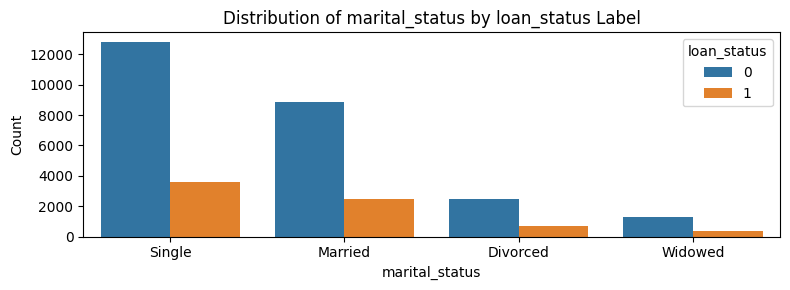


Overall distribution of marital_status:
marital_status
Single      50.237927
Married     34.967611
Divorced     9.738127
Widowed      5.056335
Name: proportion, dtype: float64

Distribution of marital_status for loan_status = 0:
marital_status
Single      50.268976
Married     34.907920
Divorced     9.738092
Widowed      5.085012
Name: proportion, dtype: float64

Distribution of marital_status for loan_status = 1:
marital_status
Single      50.126654
Married     35.181537
Divorced     9.738249
Widowed      4.953560
Name: proportion, dtype: float64
--------------------------------------------


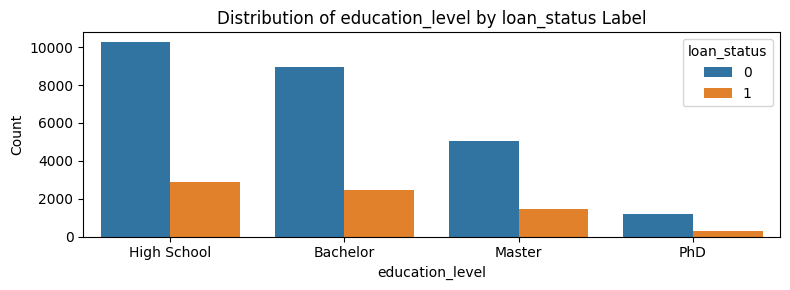


Overall distribution of education_level:
education_level
High School    40.462960
Bachelor       34.961471
Master         19.979738
PhD             4.595831
Name: proportion, dtype: float64

Distribution of education_level for loan_status = 0:
education_level
High School    40.334551
Bachelor       35.143519
Master         19.888483
PhD             4.633447
Name: proportion, dtype: float64

Distribution of education_level for loan_status = 1:
education_level
High School    40.923164
Bachelor       34.309035
Master         20.306783
PhD             4.461019
Name: proportion, dtype: float64
--------------------------------------------


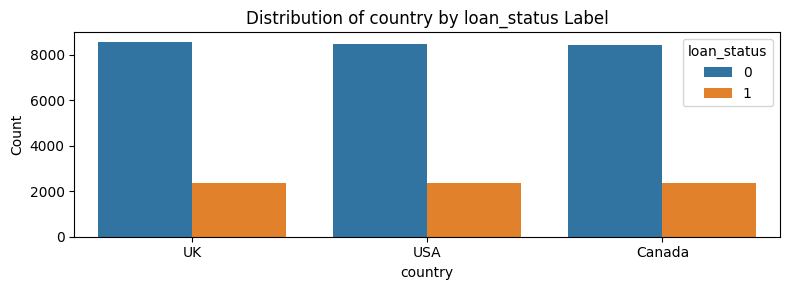


Overall distribution of country:
country
UK        33.592239
USA       33.306726
Canada    33.101035
Name: proportion, dtype: float64

Distribution of country for loan_status = 0:
country
UK        33.631759
USA       33.286214
Canada    33.082028
Name: proportion, dtype: float64

Distribution of country for loan_status = 1:
country
UK        33.450605
USA       33.380242
Canada    33.169153
Name: proportion, dtype: float64
--------------------------------------------


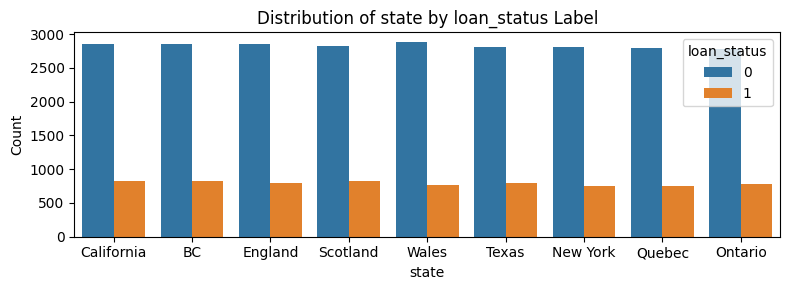


Overall distribution of state:
state
California    11.294631
BC            11.288490
England       11.217880
Scotland      11.196390
Wales         11.177969
Texas         11.073589
New York      10.938507
Quebec        10.907807
Ontario       10.904737
Name: proportion, dtype: float64

Distribution of state for loan_status = 0:
state
Wales         11.312679
England       11.218440
California    11.218440
BC            11.190953
Scotland      11.100640
New York      11.053520
Texas         11.014254
Quebec        10.994620
Ontario       10.896454
Name: proportion, dtype: float64

Distribution of state for loan_status = 1:
state
BC            11.638052
California    11.567689
Scotland      11.539544
Texas         11.286237
England       11.215874
Ontario       10.934422
Wales         10.695187
Quebec        10.596679
New York      10.526316
Name: proportion, dtype: float64
--------------------------------------------


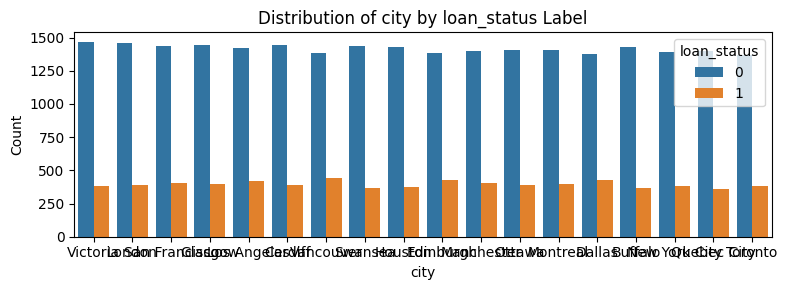


Overall distribution of city:
city
Victoria         5.682621
London           5.682621
San Francisco    5.651920
Glasgow          5.648850
Los Angeles      5.642710
Cardiff          5.621220
Vancouver        5.605870
Swansea          5.556749
Houston          5.556749
Edinburgh        5.547539
Manchester       5.535259
Ottawa           5.532189
Montreal         5.522979
Dallas           5.516839
Buffalo          5.510699
New York City    5.427808
Quebec City      5.384828
Toronto          5.372548
Name: proportion, dtype: float64

Distribution of city for loan_status = 0:
city
Victoria         5.756469
London           5.732909
Glasgow          5.670083
Cardiff          5.658303
Swansea          5.654376
San Francisco    5.650450
Houston          5.622963
Buffalo          5.599403
Los Angeles      5.567990
Ottawa           5.532650
Montreal         5.516943
Manchester       5.485530
Quebec City      5.477677
New York City    5.454117
Vancouver        5.434484
Edinburgh        5.430557

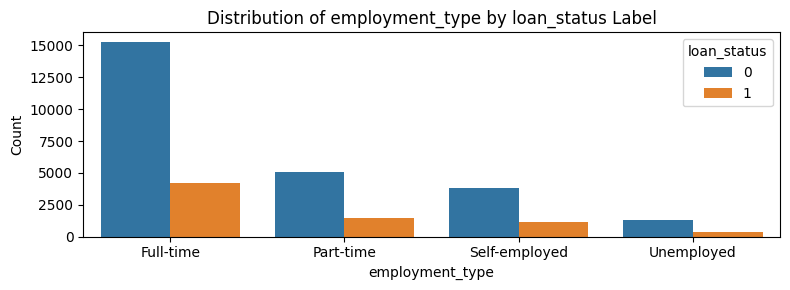


Overall distribution of employment_type:
employment_type
Full-time        59.770362
Part-time        19.979738
Self-employed    15.116815
Unemployed        5.133086
Name: proportion, dtype: float64

Distribution of employment_type for loan_status = 0:
employment_type
Full-time        59.956022
Part-time        19.978796
Self-employed    14.988024
Unemployed        5.077159
Name: proportion, dtype: float64

Distribution of employment_type for loan_status = 1:
employment_type
Full-time        59.104982
Part-time        19.983113
Self-employed    15.578384
Unemployed        5.333521
Name: proportion, dtype: float64
--------------------------------------------


In [ ]:
num_col = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length', 'loan_term_months', 'loan_to_income_ratio', 'other_debt', 'debt_to_income_ratio', 'open_accounts', 'credit_utilization_ratio', 'past_delinquencies']
cat_col = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file', 'gender', 'marital_status', 'education_level', 'country', 'state', 'city', 'employment_type']
data[num_col] = data[num_col].apply(pd.to_numeric, errors='coerce')


def check_distribution(data, columns):
    for col in columns:

        plt.figure(figsize=(18, 5))


        plt.subplot(1, 3, 1)
        sns.histplot(data=data, x=col, hue='loan_status', kde=False, bins=20, element="step", stat="density", common_norm=False)
        plt.title(f'Distribution of {col} by loan_status Label')

        plt.subplot(1, 3, 2)
        sns.boxplot(data=data, x='loan_status', y=col)
        plt.title(f'Boxplot of {col} by loan_status Label')


        plt.subplot(1, 3, 3)
        sns.boxplot(data=data, y=col)
        plt.title(f'Boxplot of {col} (Overall)')

        plt.tight_layout()
        plt.show()


        print(f'Distribution for {col}:')

        for label in sorted(data['loan_status'].dropna().unique()):
            subset = data[data['loan_status'] == label][col].dropna()
            skewness = subset.skew()
            kurtosis = subset.kurt()
            print(f"  loan_status = {label}: Skewness = {skewness:.4f}, Kurtosis = {kurtosis:.4f}")

        print('-----------------------------------------')


check_distribution(data, num_col)


def check_categorical_distribution(data, columns):
    for col in columns:
        plt.figure(figsize=(8, 3))

        # Plot
        sns.countplot(x=data[col], hue=data['loan_status'], order=data[col].value_counts().index)
        plt.title(f'Distribution of {col} by loan_status Label')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()
        # Distribusi total (semua data)
        print(f"\nOverall distribution of {col}:")
        print(data[col].value_counts(normalize=True) * 100)

        # Distribusi per label loan_status
        for label in sorted(data['loan_status'].dropna().unique()):
            subset = data[data['loan_status'] == label]
            print(f"\nDistribution of {col} for loan_status = {label}:")
            print(subset[col].value_counts(normalize=True) * 100)

        print('--------------------------------------------')


check_categorical_distribution(data, cat_col)


In [ ]:
# data.head()

In [ ]:
# data.describe()

In [ ]:
# city_default = data.groupby('city')['loan_status'].mean().sort_values(ascending=False)
# top_default_cities = city_default.head(10)
# top_nondefault_cities = city_default.tail(10)

# print("Top 10 cities with highest default rate:")
# print(top_default_cities)

# print("\nTop 10 cities with lowest default rate:")
# print(top_nondefault_cities)


In [ ]:
print("Unique Values per Column :")
print(data.nunique())
print(data.shape)

Unique Values per Column :
client_ID                     32573
person_age                       56
person_income                  4294
person_home_ownership             4
person_emp_length                47
loan_intent                       6
loan_grade                        7
loan_amnt                       753
loan_int_rate                   478
loan_status                       2
cb_person_default_on_file         2
cb_person_cred_hist_length       29
gender                            2
marital_status                    4
education_level                   4
country                           3
state                             9
city                             18
city_latitude                    18
city_longitude                   18
employment_type                   4
loan_term_months                  4
loan_to_income_ratio           9909
other_debt                    32573
debt_to_income_ratio          32573
open_accounts                    16
credit_utilization_ratio      32573
p

In [ ]:
data_before_scale = data.copy()

In [ ]:
data = data_before_scale.copy()

## DATAFRAME

In [ ]:
data_raw = data.copy()

In [ ]:
data_raw_for_analysis = data.copy() # for adding cluster

In [ ]:
# data = data_raw.copy()

## MAKING MODEL

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler
# Apply log-transform to highly skewed features
data['person_income_log'] = np.log1p(data['person_income'])
data['loan_amnt_log'] = np.log1p(data['loan_amnt'])
data['other_debt_log'] = np.log1p(data['other_debt'])

# Features for StandardScaler
standard_features = [
    'person_age',
    'person_emp_length',
    'loan_int_rate',
    'loan_term_months',
    'open_accounts',
    'past_delinquencies',
    'loan_amnt_log',

    # 'loan_to_income_ratio',
    # 'debt_to_income_ratio'
]

scaler_std = StandardScaler()
data[standard_features] = scaler_std.fit_transform(data[standard_features])

# Features for RobustScaler
robust_features = [
    'person_income_log',
    'cb_person_cred_hist_length',
    'other_debt_log'
]

scaler_robust = RobustScaler()
data[robust_features] = scaler_robust.fit_transform(data[robust_features])



In [ ]:
data = data.drop(columns=['person_income','loan_amnt','other_debt'],errors='ignore')

In [ ]:
data.head(10)

,client_ID,person_age,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,person_income_log,loan_amnt_log,other_debt_log
0,CUST_00002,-1.082750,OWN,0.057546,EDUCATION,B,0.040513,0,N,-0.4,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,-0.156257,0.104167,0.271646,0.452391,0.585436,3.505065,-2.419898,-2.856940,-1.730844
1,CUST_00003,-0.438107,MORTGAGE,-0.943096,MEDICAL,C,0.577867,1,N,-0.2,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,-0.156257,0.572917,0.860469,1.376593,0.750732,-0.709734,-2.419898,-0.462121,-1.187524
2,CUST_00004,-0.760428,RENT,-0.192614,MEDICAL,C,1.310905,1,N,-0.4,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,-1.655013,0.534351,0.643592,1.607644,0.379333,-0.709734,0.242219,2.138621,-0.229961
3,CUST_00005,-0.599268,RENT,0.808028,MEDICAL,C,1.012720,1,Y,0.0,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,-0.156257,0.643382,0.930628,-0.933913,0.228103,-0.709734,-0.015207,2.138621,0.555444
4,CUST_00006,-1.082750,OWN,-0.692935,VENTURE,A,-1.201923,1,N,-0.4,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,-0.156257,0.252525,0.475933,0.452391,0.827034,-0.709734,-2.377242,-1.569966,-1.410312
5,CUST_00007,-0.276946,RENT,0.808028,EDUCATION,B,0.438093,1,N,-0.2,Female,Widowed,High School,Canada,Ontario,Toronto,43.6532,-79.3832,Self-employed,-0.156257,0.453956,0.732860,1.607644,0.190337,0.695199,0.468269,2.138621,0.876489
6,CUST_00008,-0.599268,RENT,0.057546,MEDICAL,B,0.031195,1,N,0.0,Female,Single,High School,Canada,Quebec,Quebec City,46.8139,-71.2080,Self-employed,-0.156257,0.443285,0.624889,-0.471812,0.850098,-0.709734,0.501247,2.138621,0.468988
7,CUST_00009,-0.599268,RENT,0.808028,PERSONAL,A,-0.655251,1,N,-0.4,Female,Married,Master,USA,Texas,Dallas,32.7767,-96.7970,Part-time,-0.905635,0.421687,0.686962,0.452391,0.876532,0.695199,0.570496,2.138621,0.900259
8,CUST_00010,-1.082750,OWN,0.307707,VENTURE,D,1.158706,1,N,-0.2,Male,Single,Bachelor,UK,Scotland,Glasgow,55.8642,-4.2518,Part-time,-0.905635,0.160000,0.311356,0.683441,0.586626,-0.709734,-2.363310,-2.196892,-1.791548
9,CUST_00011,-0.921589,RENT,0.307707,VENTURE,B,-0.198655,1,N,0.0,Female,Widowed,Master,UK,England,London,51.5074,-0.1278,Full-time,1.342498,0.411765,0.630400,1.607644,0.589860,0.695199,0.603506,2.138621,0.729763


In [ ]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

binary_features = ['cb_person_default_on_file', 'gender']

for col in binary_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# loan_grade: A safest → G riskiest
loan_grade_order = [['A','B','C','D','E','F','G']]
ordinal_features = ['loan_grade']
ordinal_enc = OrdinalEncoder(categories=loan_grade_order)
data[ordinal_features] = ordinal_enc.fit_transform(data[ordinal_features])


education_order = [['High School', 'Bachelor', 'Master', 'PhD']]
data['education_level'] = OrdinalEncoder(categories=education_order).fit_transform(data[['education_level']])

one_hot_features = [
    'person_home_ownership',
    'loan_intent',
    'marital_status',
    'country',
    'state',
    'city',
    'employment_type'
]

data = pd.get_dummies(data, columns=one_hot_features, drop_first=False)


In [ ]:
data.head()

,client_ID,person_age,person_emp_length,loan_grade,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,gender,education_level,city_latitude,city_longitude,loan_term_months,loan_to_income_ratio,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,person_income_log,loan_amnt_log,other_debt_log,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,country_Canada,country_UK,country_USA,state_BC,state_California,state_England,state_New York,state_Ontario,state_Quebec,state_Scotland,state_Texas,state_Wales,city_Buffalo,city_Cardiff,city_Dallas,city_Edinburgh,city_Glasgow,city_Houston,city_London,city_Los Angeles,city_Manchester,city_Montreal,city_New York City,city_Ottawa,city_Quebec City,city_San Francisco,city_Swansea,city_Toronto,city_Vancouver,city_Victoria,employment_type_Full-time,employment_type_Part-time,employment_type_Self-employed,employment_type_Unemployed
0,CUST_00002,-1.082750,0.057546,1.0,0.040513,0,0,-0.4,0,2.0,43.6532,-79.3832,-0.156257,0.104167,0.271646,0.452391,0.585436,3.505065,-2.419898,-2.856940,-1.730844,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False
1,CUST_00003,-0.438107,-0.943096,2.0,0.577867,1,0,-0.2,0,2.0,51.6214,-3.9436,-0.156257,0.572917,0.860469,1.376593,0.750732,-0.709734,-2.419898,-0.462121,-1.187524,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False
2,CUST_00004,-0.760428,-0.192614,2.0,1.310905,1,0,-0.4,1,1.0,49.2827,-123.1207,-1.655013,0.534351,0.643592,1.607644,0.379333,-0.709734,0.242219,2.138621,-0.229961,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False
3,CUST_00005,-0.599268,0.808028,2.0,1.012720,1,1,0.0,0,1.0,42.8864,-78.8784,-0.156257,0.643382,0.930628,-0.933913,0.228103,-0.709734,-0.015207,2.138621,0.555444,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,CUST_00006,-1.082750,-0.692935,0.0,-1.201923,1,0,-0.4,1,0.0,37.7749,-122.4194,-0.156257,0.252525,0.475933,0.452391,0.827034,-0.709734,-2.377242,-1.569966,-1.410312,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False


In [ ]:
scaler = StandardScaler()
data['loan_grade_scaled'] = scaler.fit_transform(data[['loan_grade']])



In [ ]:
data = data.drop(columns=['loan_grade','city_longitude','city_latitude'], errors='ignore')

In [ ]:
data.head()

,client_ID,person_age,person_emp_length,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,gender,education_level,loan_term_months,loan_to_income_ratio,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,person_income_log,loan_amnt_log,other_debt_log,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Widowed,country_Canada,country_UK,country_USA,state_BC,state_California,state_England,state_New York,state_Ontario,state_Quebec,state_Scotland,state_Texas,state_Wales,city_Buffalo,city_Cardiff,city_Dallas,city_Edinburgh,city_Glasgow,city_Houston,city_London,city_Los Angeles,city_Manchester,city_Montreal,city_New York City,city_Ottawa,city_Quebec City,city_San Francisco,city_Swansea,city_Toronto,city_Vancouver,city_Victoria,employment_type_Full-time,employment_type_Part-time,employment_type_Self-employed,employment_type_Unemployed,loan_grade_scaled
0,CUST_00002,-1.082750,0.057546,0.040513,0,0,-0.4,0,2.0,-0.156257,0.104167,0.271646,0.452391,0.585436,3.505065,-2.419898,-2.856940,-1.730844,False,False,True,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,-0.186953
1,CUST_00003,-0.438107,-0.943096,0.577867,1,0,-0.2,0,2.0,-0.156257,0.572917,0.860469,1.376593,0.750732,-0.709734,-2.419898,-0.462121,-1.187524,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,0.670620
2,CUST_00004,-0.760428,-0.192614,1.310905,1,0,-0.4,1,1.0,-1.655013,0.534351,0.643592,1.607644,0.379333,-0.709734,0.242219,2.138621,-0.229961,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,0.670620
3,CUST_00005,-0.599268,0.808028,1.012720,1,1,0.0,0,1.0,-0.156257,0.643382,0.930628,-0.933913,0.228103,-0.709734,-0.015207,2.138621,0.555444,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,0.670620
4,CUST_00006,-1.082750,-0.692935,-1.201923,1,0,-0.4,1,0.0,-0.156257,0.252525,0.475933,0.452391,0.827034,-0.709734,-2.377242,-1.569966,-1.410312,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,-1.044527


## MODEL

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [03:28:42] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== Train Classification Report ===
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     20373
           1       0.99      0.76      0.86      5685

    accuracy                           0.95     26058
   macro avg       0.96      0.88      0.91     26058
weighted avg       0.95      0.95      0.94     26058

=== Test Classification Report ===
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5094
           1       0.98      0.73      0.84      1421

    accuracy                           0.94      6515
   macro avg       0.95      0.86      0.90      6515
weighted avg       0.94      0.94      0.93      6515



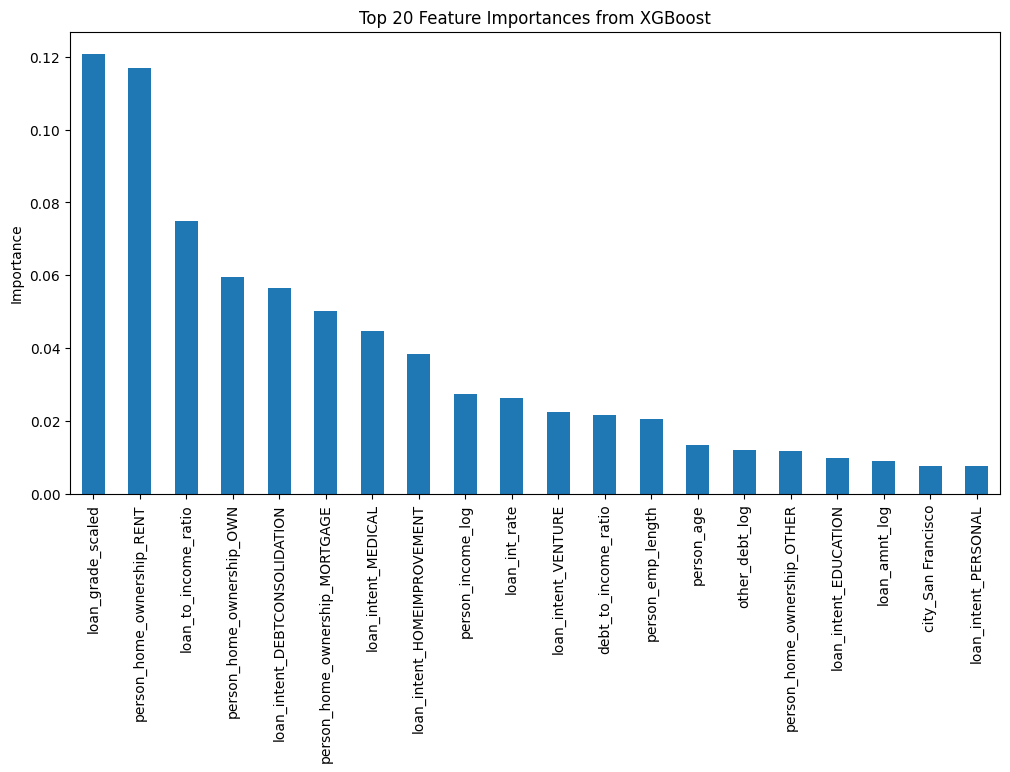

[[5068   26]
 [ 380 1041]]


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from xgboost import XGBClassifier


X = data.drop(columns=['loan_status','client_ID'],errors='ignore')
y = data['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = XGBClassifier(
    n_estimators=200,
    max_depth=5,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("=== Train Classification Report ===")
print(classification_report(y_train, y_train_pred))

print("=== Test Classification Report ===")
print(classification_report(y_test, y_test_pred))


importances = pd.Series(model.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(12,6))
importances[:20].plot(kind='bar')  # top 20 features
plt.title("Top 20 Feature Importances from XGBoost")
plt.ylabel("Importance")
plt.show()

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

In [ ]:
# X_train.info()

In [ ]:

# X_train = X_train.astype({col: 'float' for col in X_train.select_dtypes('bool').columns})
# X_test = X_test.astype({col: 'float' for col in X_test.select_dtypes('bool').columns})


X_train = X_train.astype(float)
X_test = X_test.astype(float)


 98%|===================| 6413/6515 [00:44<00:00]       

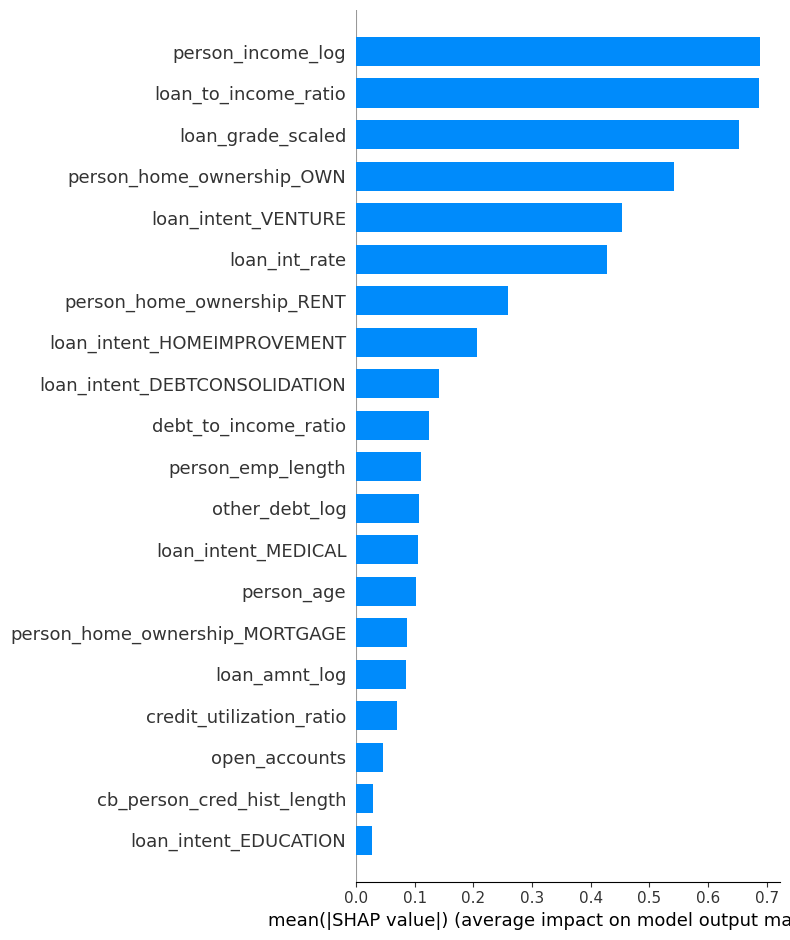

In [ ]:
import shap

explainer = shap.Explainer(model, X_train)

shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


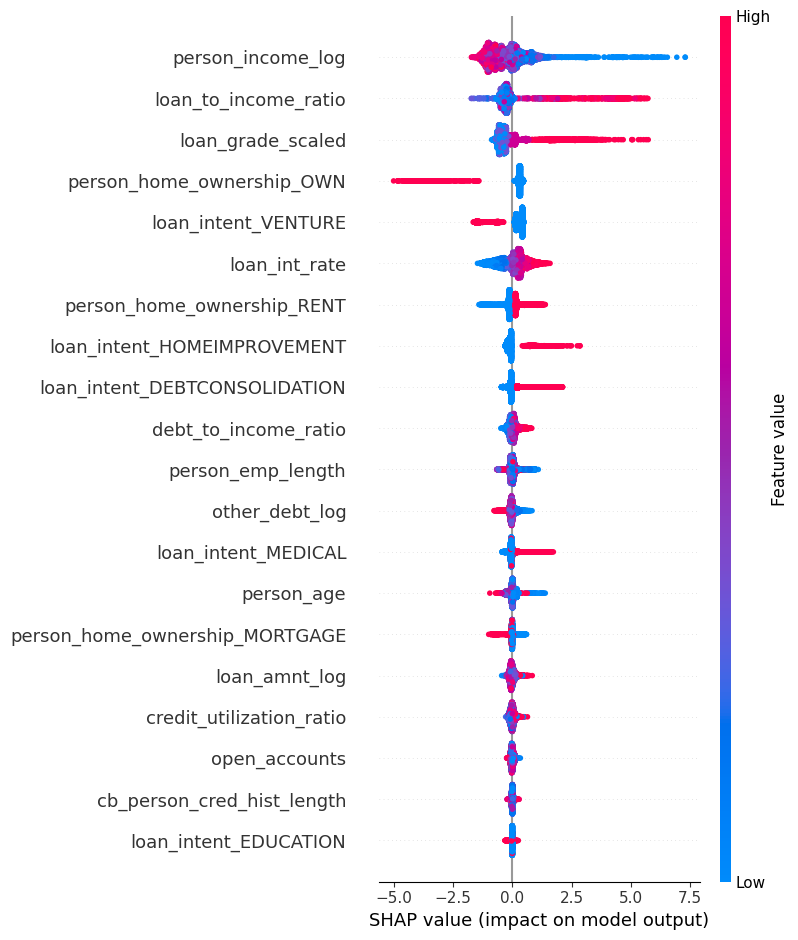

In [ ]:
shap.summary_plot(shap_values, X_test)


In [ ]:
# data.head()

In [ ]:
# data.describe()

In [ ]:
top_n = 20
top_features = importances.head(top_n)
print(f"Top {top_n} features by importance:")
print(top_features)

Top 20 features by importance:
loan_grade_scaled                 0.120896
person_home_ownership_RENT        0.116838
loan_to_income_ratio              0.074835
person_home_ownership_OWN         0.059501
loan_intent_DEBTCONSOLIDATION     0.056555
person_home_ownership_MORTGAGE    0.050226
loan_intent_MEDICAL               0.044702
loan_intent_HOMEIMPROVEMENT       0.038299
person_income_log                 0.027475
loan_int_rate                     0.026283
loan_intent_VENTURE               0.022304
debt_to_income_ratio              0.021552
person_emp_length                 0.020540
person_age                        0.013314
other_debt_log                    0.012047
person_home_ownership_OTHER       0.011588
loan_intent_EDUCATION             0.009798
loan_amnt_log                     0.008990
city_San Francisco                0.007648
loan_intent_PERSONAL              0.007529
dtype: float32


## CLUSTERING FOR HIGH RISK CUSTOMER

Number of clusters: 1, Inertia: 527190.85
Number of clusters: 2, Inertia: 480606.64
Number of clusters: 3, Inertia: 452418.11
Number of clusters: 4, Inertia: 435019.46
Number of clusters: 5, Inertia: 423748.27
Number of clusters: 6, Inertia: 412674.33
Number of clusters: 7, Inertia: 403159.75
Number of clusters: 8, Inertia: 394961.58
Number of clusters: 9, Inertia: 389373.49
Number of clusters: 10, Inertia: 384459.02


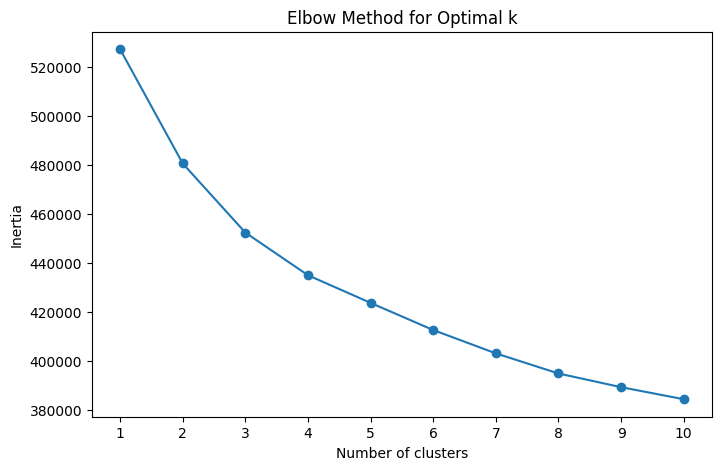

In [ ]:
from sklearn.cluster import KMeans


df_features = data.drop(columns=['client_ID', 'loan_status'])

inertia_list = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_features)
    inertia_list.append(kmeans.inertia_)
    print(f"Number of clusters: {k}, Inertia: {kmeans.inertia_:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia_list, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.xticks(K_range)
plt.show()


In [ ]:
# Cluster 0 = riskiest: 35% default (loan_status = 1).
# Cluster 1 = low risk: around 10% default.

# Meaning:
# Cluster 0 can be considered a "high-risk" borrower group.
# Cluster 1 is low risk

cluster  loan_status
0        0              0.618000
         1              0.382000
1        0              0.869136
         1              0.130864
Name: proportion, dtype: float64


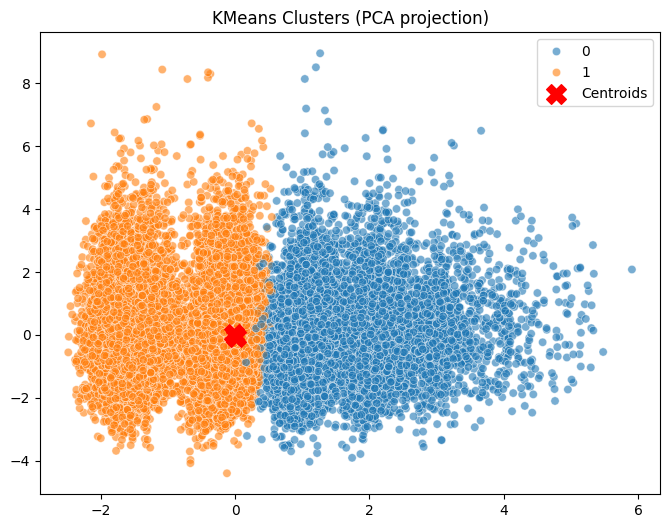

In [ ]:
from sklearn.cluster import KMeans



X = data.drop(columns=["loan_status",'client_ID']).astype(float)
y = data["loan_status"]

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X)

data_raw_for_analysis['cluster'] = clusters

print(data_raw_for_analysis.groupby("cluster")["loan_status"].value_counts(normalize=True))

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=clusters, palette="tab10", alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=200, c="red", marker="X", label="Centroids")
plt.title("KMeans Clusters (PCA projection)")
plt.legend()
plt.show()


In [ ]:
# data_raw_for_analysis.info()

In [ ]:
# Group by cluster
cluster_summary = data_raw_for_analysis.groupby('cluster').agg(
    num_customers=('client_ID', 'count'),
    default_rate=('loan_status', 'mean'),

    avg_loan_amount=('loan_amnt', 'mean'),
    median_loan_amount=('loan_amnt', 'median'),

    avg_income=('person_income', 'mean'),
    median_income=('person_income', 'median'),

    avg_loan_int_rate=('loan_int_rate', 'mean'),
    median_loan_int_rate=('loan_int_rate', 'median'),

    avg_loan_term=('loan_term_months', 'mean'),
    median_loan_term=('loan_term_months', 'median'),

    avg_loan_to_income_ratio=('loan_to_income_ratio', 'mean'),
    median_loan_to_income_ratio=('loan_to_income_ratio', 'median'),

    avg_debt_to_income_ratio=('debt_to_income_ratio', 'mean'),
    median_debt_to_income_ratio=('debt_to_income_ratio', 'median'),

    avg_other_debt=('other_debt', 'mean'),
    median_other_debt=('other_debt', 'median'),

    avg_credit_utilization=('credit_utilization_ratio', 'mean'),
    median_credit_utilization=('credit_utilization_ratio', 'median'),

    avg_open_accounts=('open_accounts', 'mean'),
    median_open_accounts=('open_accounts', 'median'),

    avg_past_delinquencies=('past_delinquencies', 'mean'),
    median_past_delinquencies=('past_delinquencies', 'median')
).reset_index()

loan_status_dist = data_raw_for_analysis.groupby(['cluster', 'loan_status']).size().unstack(fill_value=0)
loan_status_dist_percent = loan_status_dist.div(loan_status_dist.sum(axis=1), axis=0)


cluster_summary = cluster_summary.merge(loan_status_dist_percent, left_on='cluster', right_index=True)


# print(cluster_summary)


In [ ]:
cluster_summary

,cluster,num_customers,default_rate,avg_loan_amount,median_loan_amount,avg_income,median_income,avg_loan_int_rate,median_loan_int_rate,avg_loan_term,median_loan_term,avg_loan_to_income_ratio,median_loan_to_income_ratio,avg_debt_to_income_ratio,median_debt_to_income_ratio,avg_other_debt,median_other_debt,avg_credit_utilization,median_credit_utilization,avg_open_accounts,median_open_accounts,avg_past_delinquencies,median_past_delinquencies,0,1
0,0,11322,0.382000,10218.177001,8500.0,64790.680622,54000.0,14.529646,14.22,38.618972,36.0,0.182299,0.163934,0.356572,0.345187,11289.634520,8669.346423,0.493569,0.490253,7.996997,8.0,0.498498,0.0,0.618000,0.382000
1,1,21251,0.130864,9252.371653,8000.0,66458.921839,56400.0,9.134158,9.25,38.439979,36.0,0.164293,0.140761,0.339144,0.326736,11656.375196,9182.579710,0.503266,0.505398,8.066020,8.0,0.508729,0.0,0.869136,0.130864


In [ ]:
cluster_status_summary = data_raw_for_analysis.groupby(['cluster', 'loan_status']).agg(
    num_customers=('client_ID', 'count'),
    avg_loan_amount=('loan_amnt', 'mean'),
    median_loan_amount=('loan_amnt', 'median'),
    avg_income=('person_income', 'mean'),
    median_income=('person_income', 'median'),
    avg_loan_int_rate=('loan_int_rate', 'mean'),
    median_loan_int_rate=('loan_int_rate', 'median'),
    avg_loan_term=('loan_term_months', 'mean'),
    median_loan_term=('loan_term_months', 'median'),
    avg_loan_to_income_ratio=('loan_to_income_ratio', 'mean'),
    median_loan_to_income_ratio=('loan_to_income_ratio', 'median'),
    avg_debt_to_income_ratio=('debt_to_income_ratio', 'mean'),
    median_debt_to_income_ratio=('debt_to_income_ratio', 'median'),
    avg_other_debt=('other_debt', 'mean'),
    median_other_debt=('other_debt', 'median'),
    avg_credit_utilization=('credit_utilization_ratio', 'mean'),
    median_credit_utilization=('credit_utilization_ratio', 'median'),
    avg_open_accounts=('open_accounts', 'mean'),
    median_open_accounts=('open_accounts', 'median'),
    avg_past_delinquencies=('past_delinquencies', 'mean'),
    median_past_delinquencies=('past_delinquencies', 'median')
).reset_index()

In [ ]:
cluster_status_summary

,cluster,loan_status,num_customers,avg_loan_amount,median_loan_amount,avg_income,median_income,avg_loan_int_rate,median_loan_int_rate,avg_loan_term,median_loan_term,avg_loan_to_income_ratio,median_loan_to_income_ratio,avg_debt_to_income_ratio,median_debt_to_income_ratio,avg_other_debt,median_other_debt,avg_credit_utilization,median_credit_utilization,avg_open_accounts,median_open_accounts,avg_past_delinquencies,median_past_delinquencies
0,0,0,6997,9715.120766,8000.0,71537.044448,60000.0,14.111144,13.64,38.239817,36.0,0.153668,0.142857,0.327064,0.322797,12399.447605,9576.338062,0.490741,0.486657,8.041446,8.0,0.500786,0.0
1,0,1,4325,11032.023121,9600.0,53876.389827,45000.0,15.206700,15.21,39.232370,36.0,0.228617,0.210084,0.404310,0.391859,9494.175062,7369.352873,0.498145,0.495284,7.925087,8.0,0.494798,0.0
2,1,0,18470,9055.388468,8000.0,70181.634976,60000.0,9.052391,8.94,38.463671,36.0,0.146876,0.130868,0.321783,0.315221,12309.733675,9774.150230,0.501997,0.503427,8.051381,8.0,0.506605,0.0
3,1,1,2781,10560.634664,9800.0,41734.537936,36000.0,9.677213,10.25,38.282632,36.0,0.279966,0.310535,0.454444,0.457091,7317.097565,5722.168723,0.511698,0.517871,8.163251,8.0,0.522834,0.0


In [ ]:

categorical_cols = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'cb_person_default_on_file', 'gender', 'marital_status',
    'education_level', 'country', 'state', 'city', 'employment_type'
]

for col in categorical_cols:
    print(f"\n=== {col} distribution by cluster ===")
    print(pd.crosstab(data_raw_for_analysis[col], data_raw_for_analysis['cluster'], normalize='columns'))



=== person_home_ownership distribution by cluster ===
cluster                       0         1
person_home_ownership                    
MORTGAGE               0.345787  0.448214
OTHER                  0.004151  0.002823
OWN                    0.075252  0.081502
RENT                   0.574810  0.467460

=== loan_intent distribution by cluster ===
cluster                   0         1
loan_intent                          
DEBTCONSOLIDATION  0.161721  0.159051
EDUCATION          0.198463  0.197826
HOMEIMPROVEMENT    0.120208  0.105595
MEDICAL            0.185568  0.186815
PERSONAL           0.165077  0.171757
VENTURE            0.168963  0.178956

=== loan_grade distribution by cluster ===
cluster            0         1
loan_grade                    
A           0.000000  0.507082
B           0.000000  0.491647
C           0.568009  0.001176
D           0.319996  0.000094
E           0.085144  0.000000
F           0.021286  0.000000
G           0.005564  0.000000

=== cb_person_defaul

In [ ]:

categorical_cols = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'cb_person_default_on_file', 'gender', 'marital_status',
    'education_level', 'country', 'state', 'city', 'employment_type'
]

for col in categorical_cols:
    print(f"\n=== {col} distribution by cluster ===")
    print(pd.crosstab(
        data_raw_for_analysis[col],
        data_raw_for_analysis['cluster'],
        normalize='columns'
    ))

for col in categorical_cols:
    print(f"\n=== {col} distribution by cluster & loan_status ===")
    print(pd.crosstab(
        [data_raw_for_analysis[col], data_raw_for_analysis['loan_status']],
        data_raw_for_analysis['cluster'],
        normalize='columns'
    ))



=== person_home_ownership distribution by cluster ===
cluster                       0         1
person_home_ownership                    
MORTGAGE               0.345787  0.448214
OTHER                  0.004151  0.002823
OWN                    0.075252  0.081502
RENT                   0.574810  0.467460

=== loan_intent distribution by cluster ===
cluster                   0         1
loan_intent                          
DEBTCONSOLIDATION  0.161721  0.159051
EDUCATION          0.198463  0.197826
HOMEIMPROVEMENT    0.120208  0.105595
MEDICAL            0.185568  0.186815
PERSONAL           0.165077  0.171757
VENTURE            0.168963  0.178956

=== loan_grade distribution by cluster ===
cluster            0         1
loan_grade                    
A           0.000000  0.507082
B           0.000000  0.491647
C           0.568009  0.001176
D           0.319996  0.000094
E           0.085144  0.000000
F           0.021286  0.000000
G           0.005564  0.000000

=== cb_person_defaul

In [ ]:
data_raw_for_analysis.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,cluster
0,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3,1
1,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0,0
2,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0,0
3,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0,0
4,CUST_00006,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,36,0.252525,2211.741134,0.475933,10,0.827034,0,1


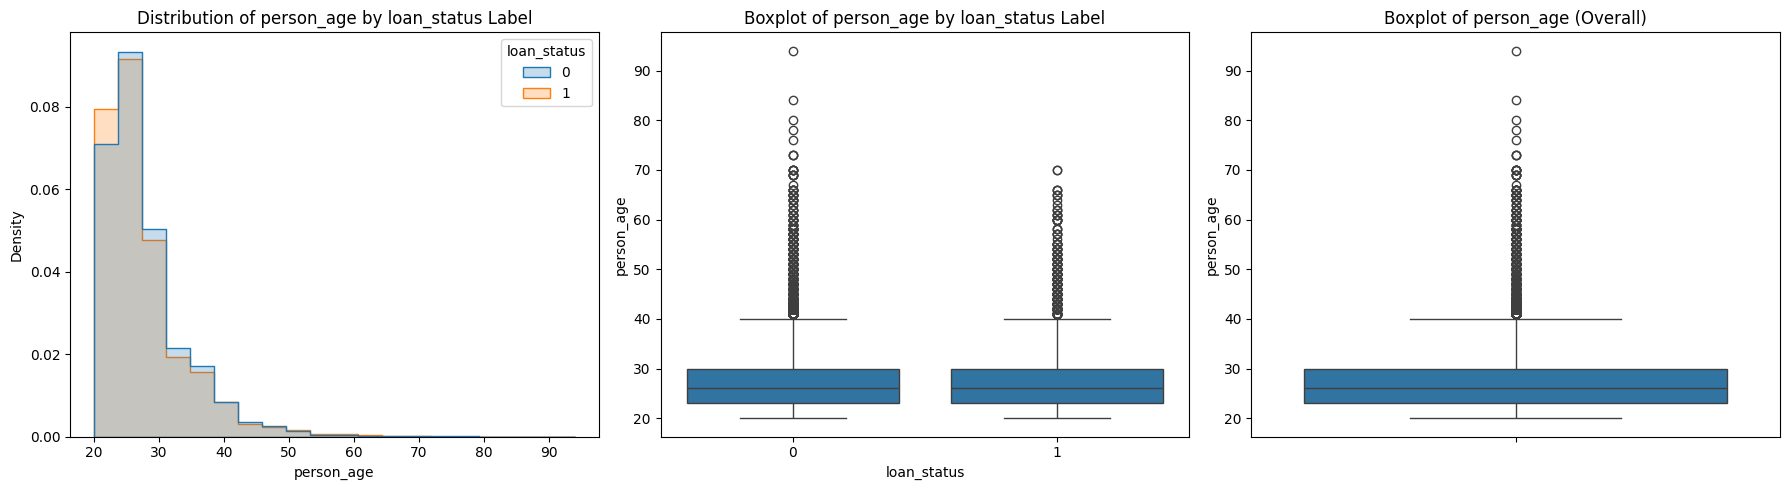

Distribution for person_age:
  loan_status = 0: Skewness = 1.9347, Kurtosis = 5.9834
  loan_status = 1: Skewness = 1.9866, Kurtosis = 5.5577
-----------------------------------------


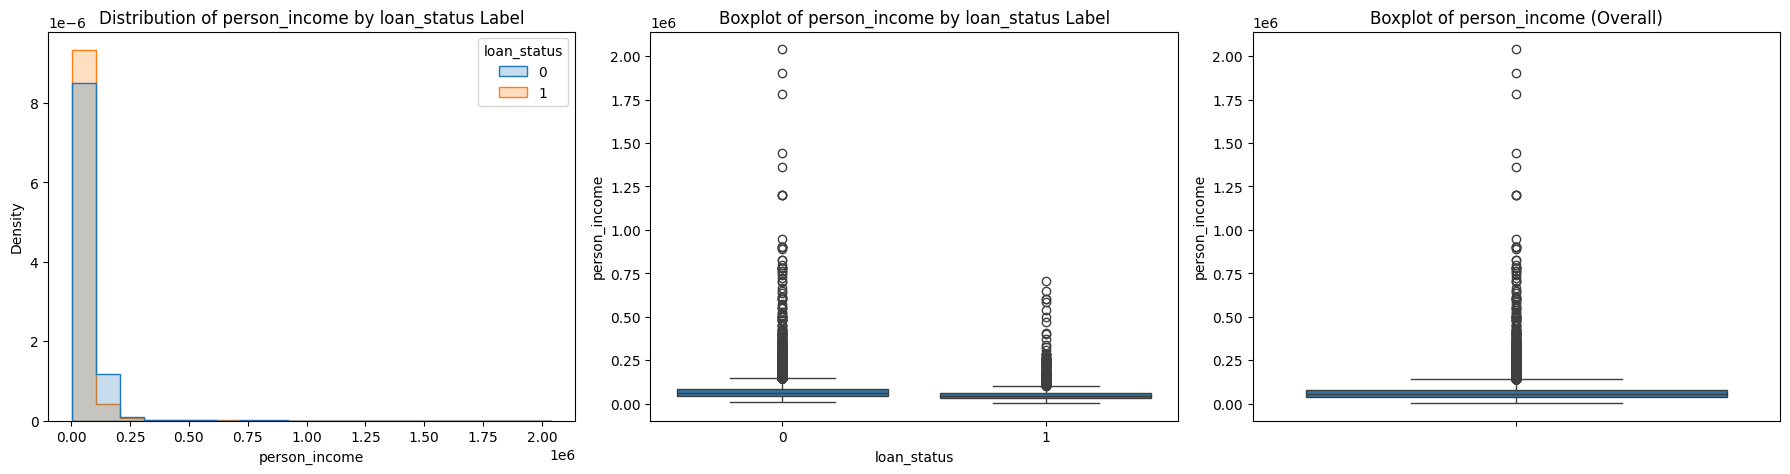

Distribution for person_income:
  loan_status = 0: Skewness = 10.1541, Kurtosis = 229.2600
  loan_status = 1: Skewness = 5.4704, Kurtosis = 62.1182
-----------------------------------------


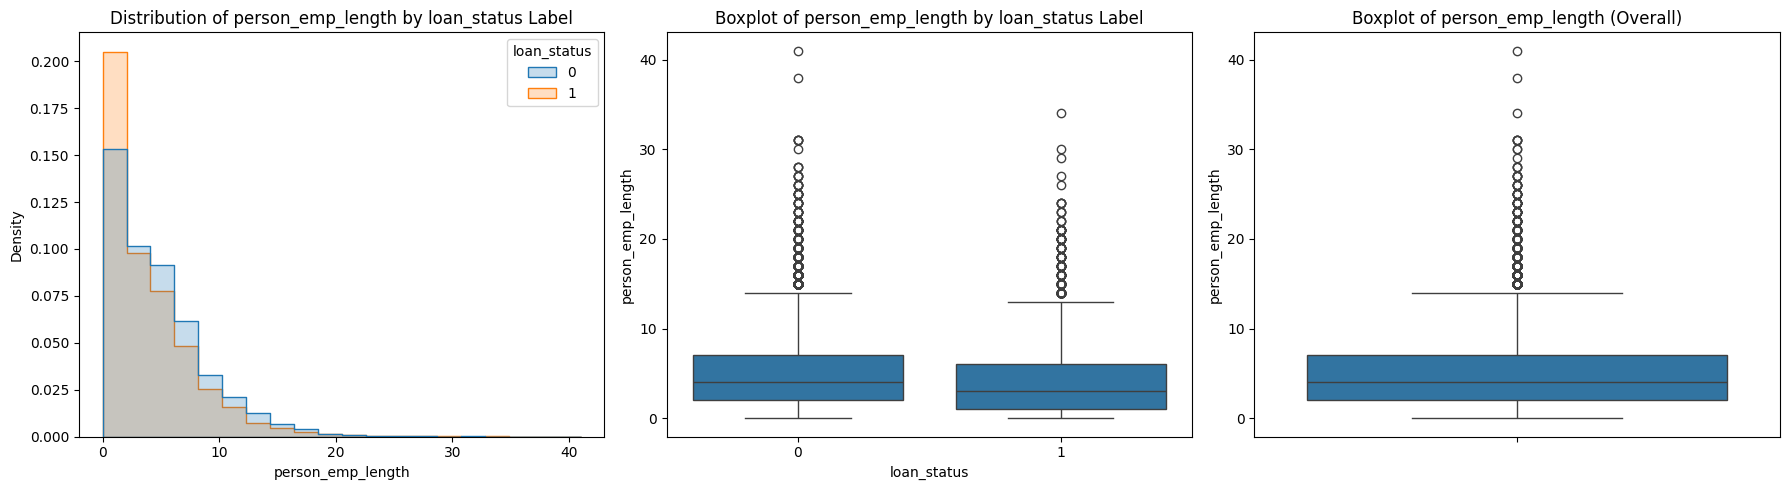

Distribution for person_emp_length:
  loan_status = 0: Skewness = 1.2146, Kurtosis = 2.3427
  loan_status = 1: Skewness = 1.4989, Kurtosis = 3.5270
-----------------------------------------


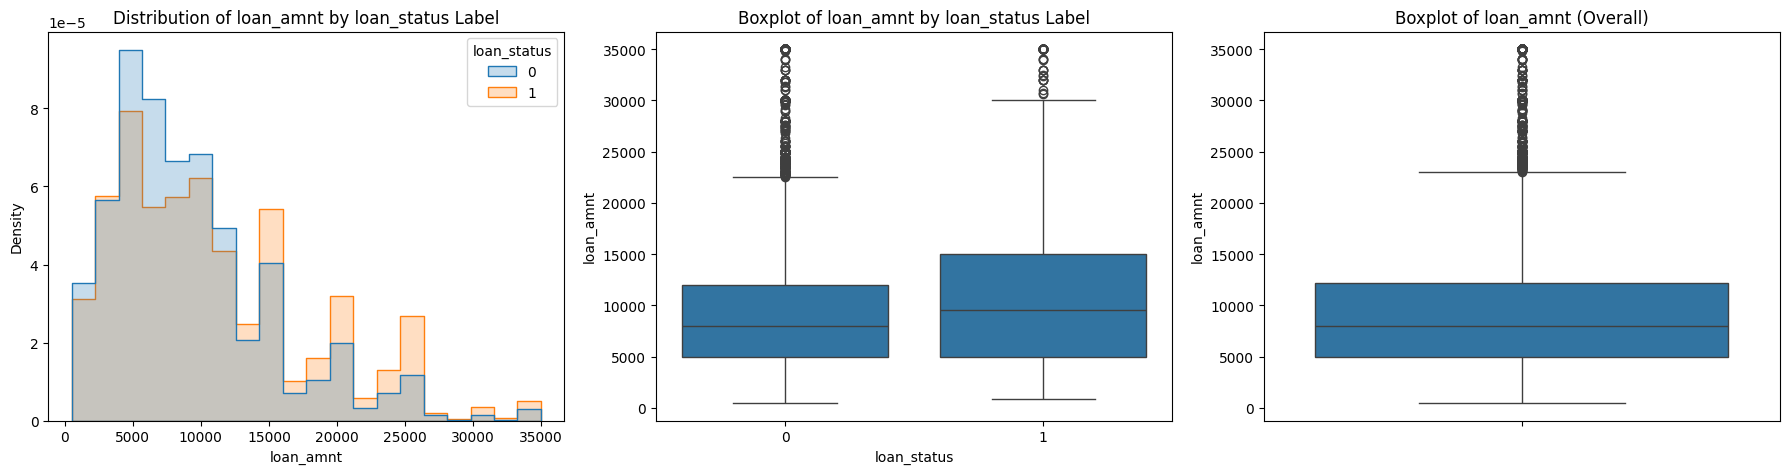

Distribution for loan_amnt:
  loan_status = 0: Skewness = 1.2704, Kurtosis = 1.8464
  loan_status = 1: Skewness = 0.8970, Kurtosis = 0.3205
-----------------------------------------


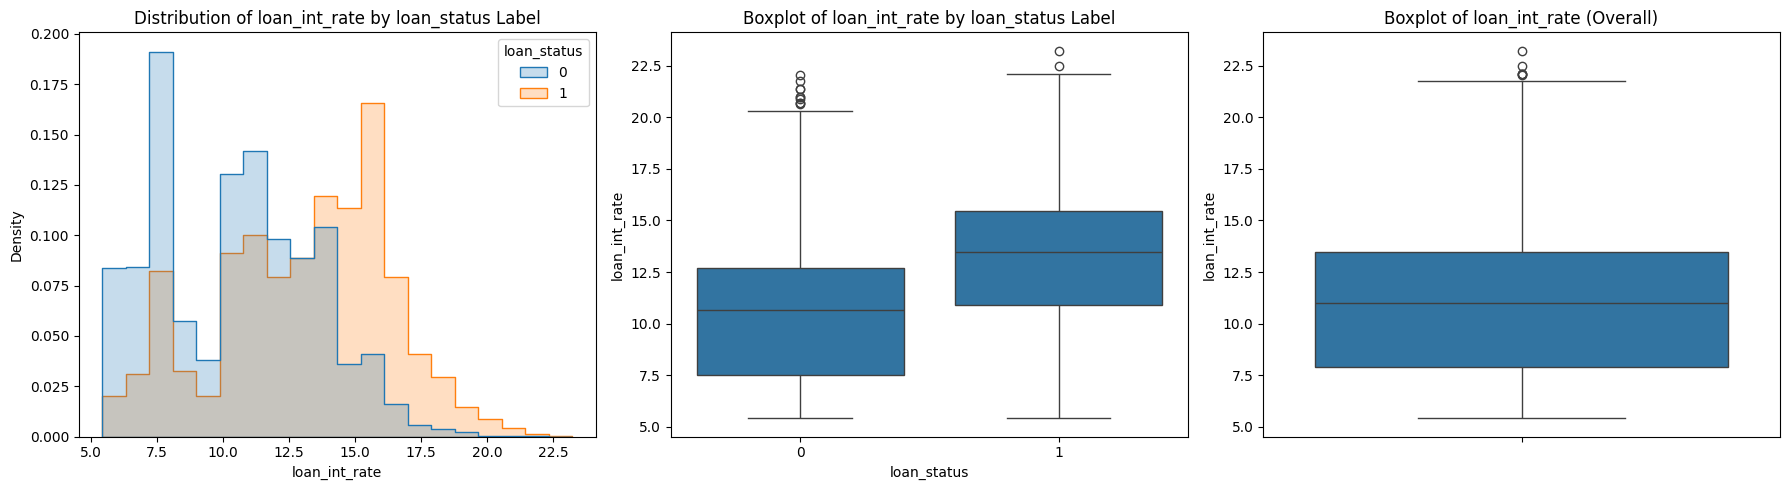

Distribution for loan_int_rate:
  loan_status = 0: Skewness = 0.2335, Kurtosis = -0.6936
  loan_status = 1: Skewness = -0.2626, Kurtosis = -0.5301
-----------------------------------------


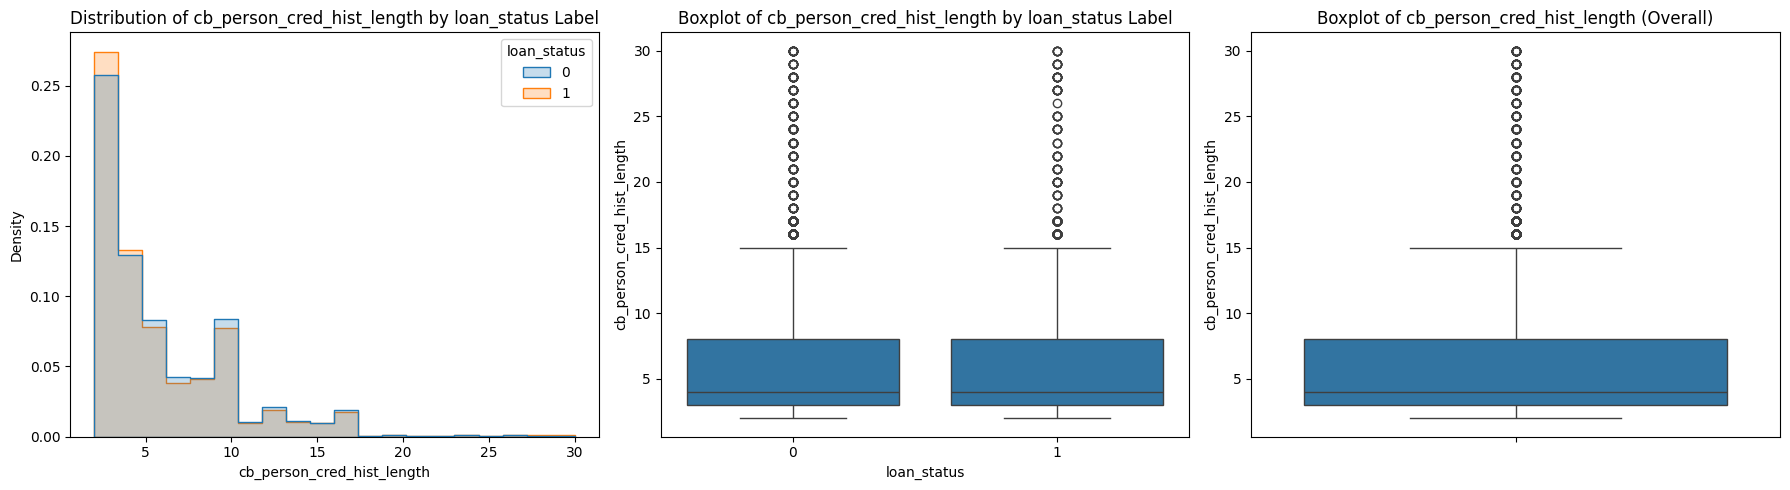

Distribution for cb_person_cred_hist_length:
  loan_status = 0: Skewness = 1.6156, Kurtosis = 3.4720
  loan_status = 1: Skewness = 1.8190, Kurtosis = 4.5482
-----------------------------------------


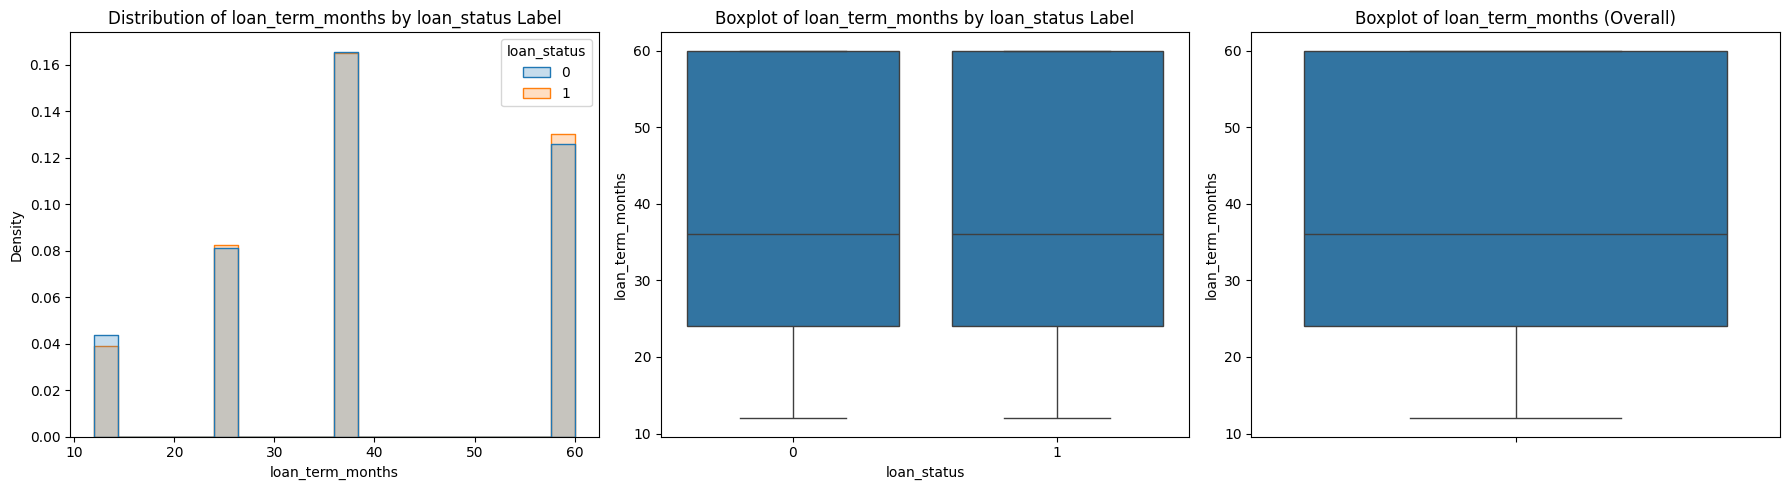

Distribution for loan_term_months:
  loan_status = 0: Skewness = 0.1281, Kurtosis = -1.1043
  loan_status = 1: Skewness = 0.1164, Kurtosis = -1.1284
-----------------------------------------


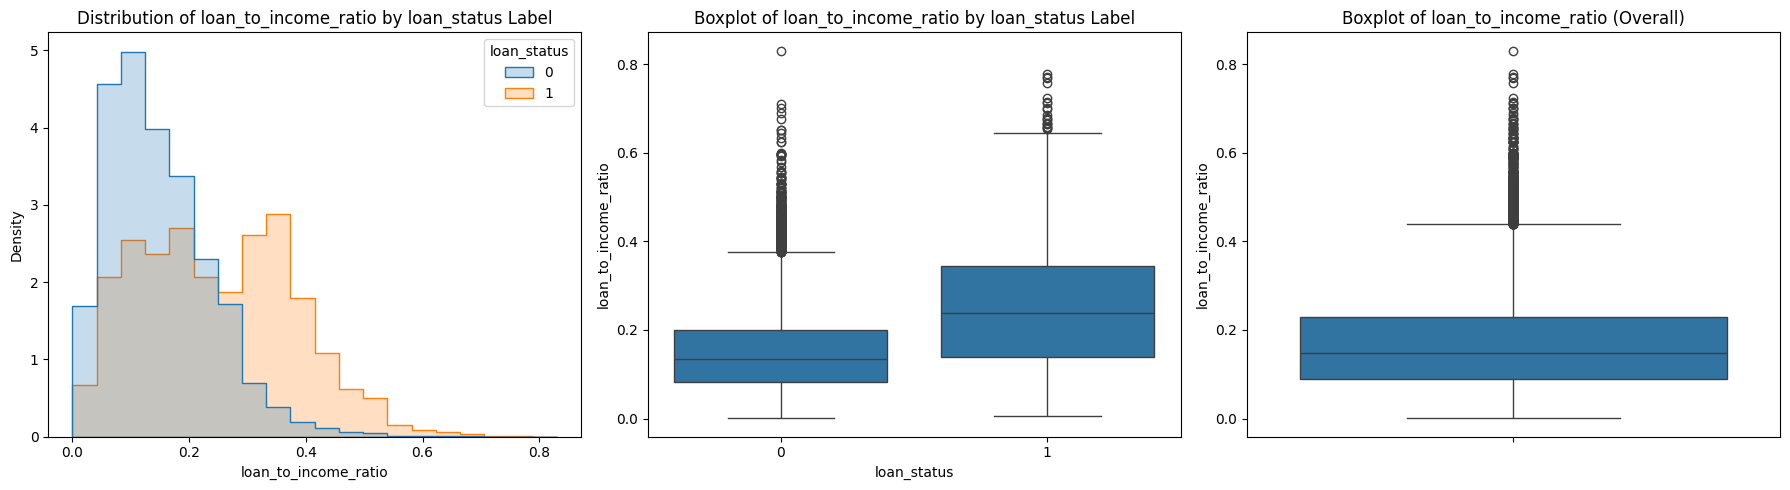

Distribution for loan_to_income_ratio:
  loan_status = 0: Skewness = 1.0291, Kurtosis = 1.6831
  loan_status = 1: Skewness = 0.3425, Kurtosis = -0.4641
-----------------------------------------


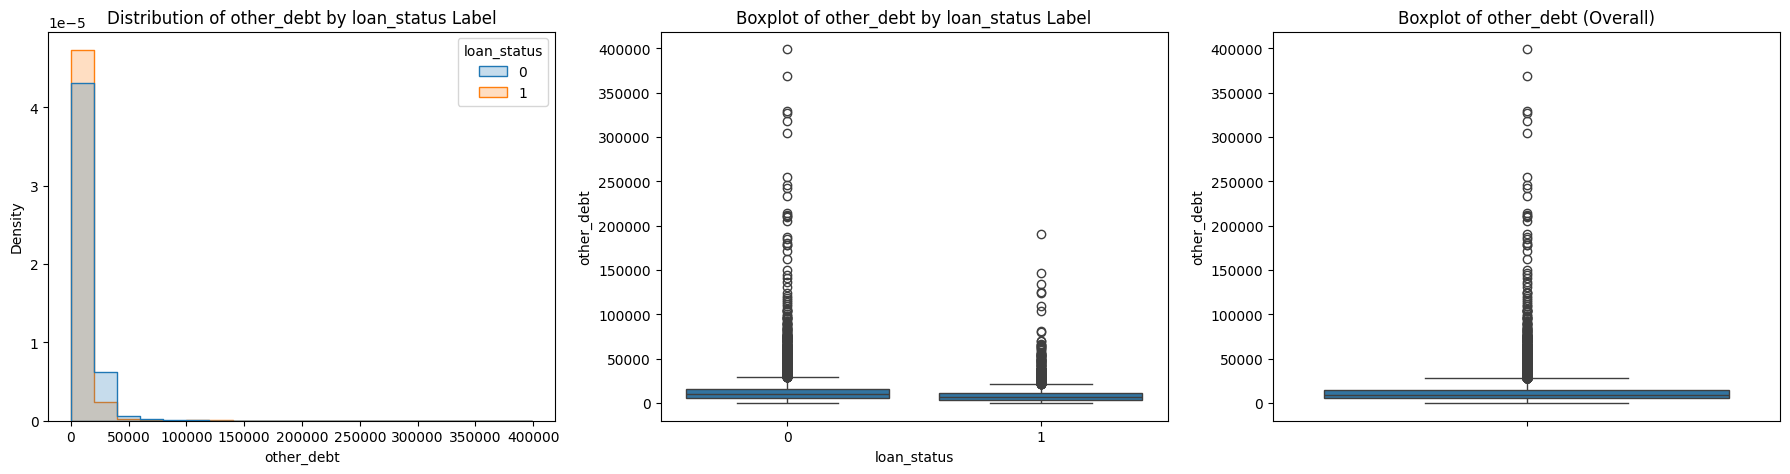

Distribution for other_debt:
  loan_status = 0: Skewness = 9.5045, Kurtosis = 199.3083
  loan_status = 1: Skewness = 5.9525, Kurtosis = 79.8320
-----------------------------------------


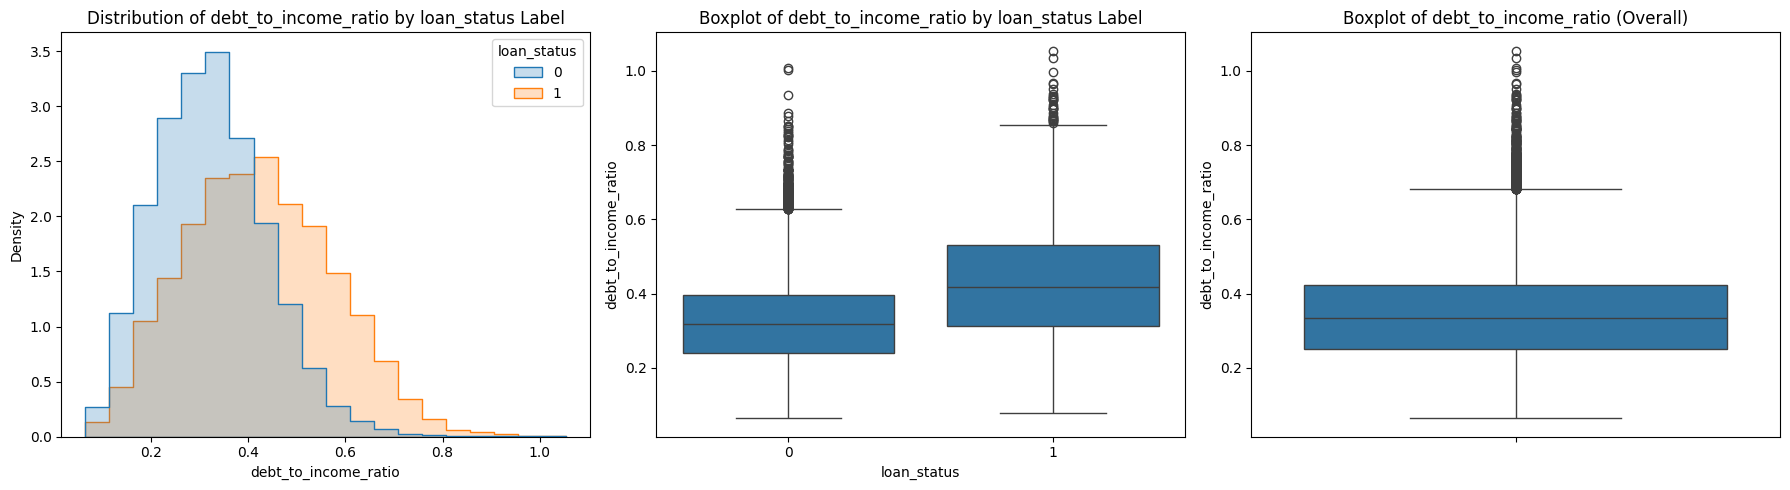

Distribution for debt_to_income_ratio:
  loan_status = 0: Skewness = 0.4726, Kurtosis = 0.3771
  loan_status = 1: Skewness = 0.2595, Kurtosis = -0.2485
-----------------------------------------


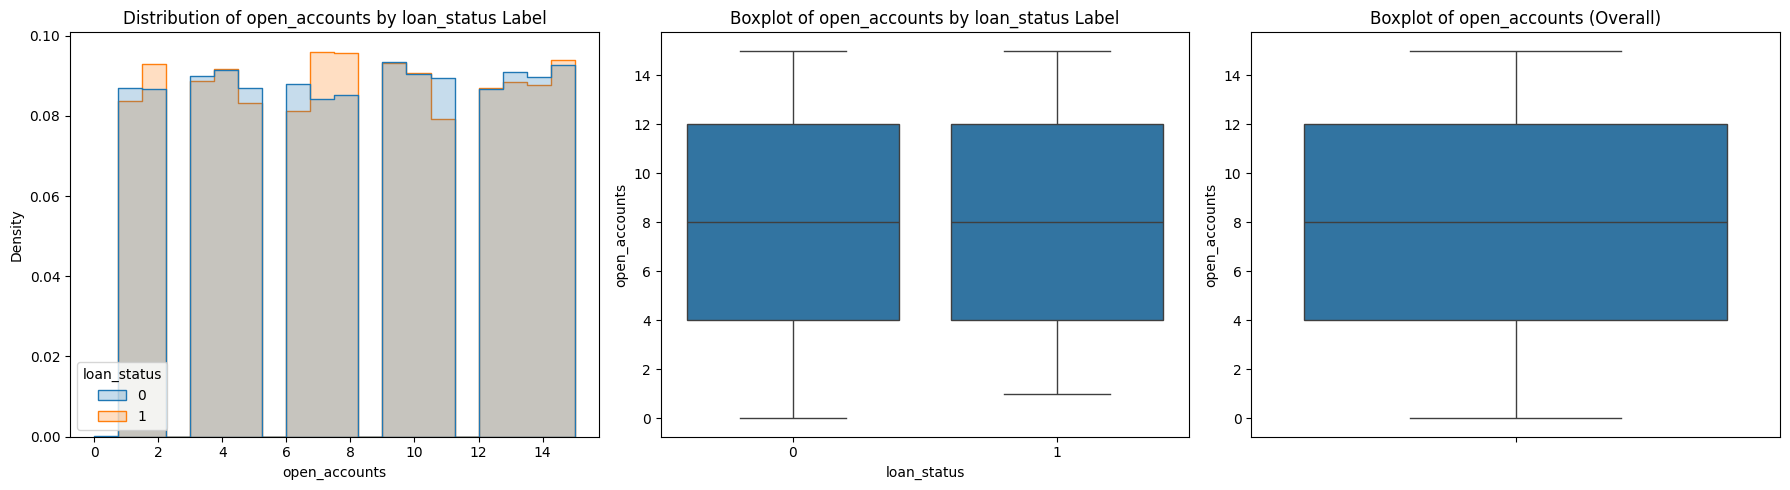

Distribution for open_accounts:
  loan_status = 0: Skewness = -0.0108, Kurtosis = -1.2179
  loan_status = 1: Skewness = 0.0063, Kurtosis = -1.1987
-----------------------------------------


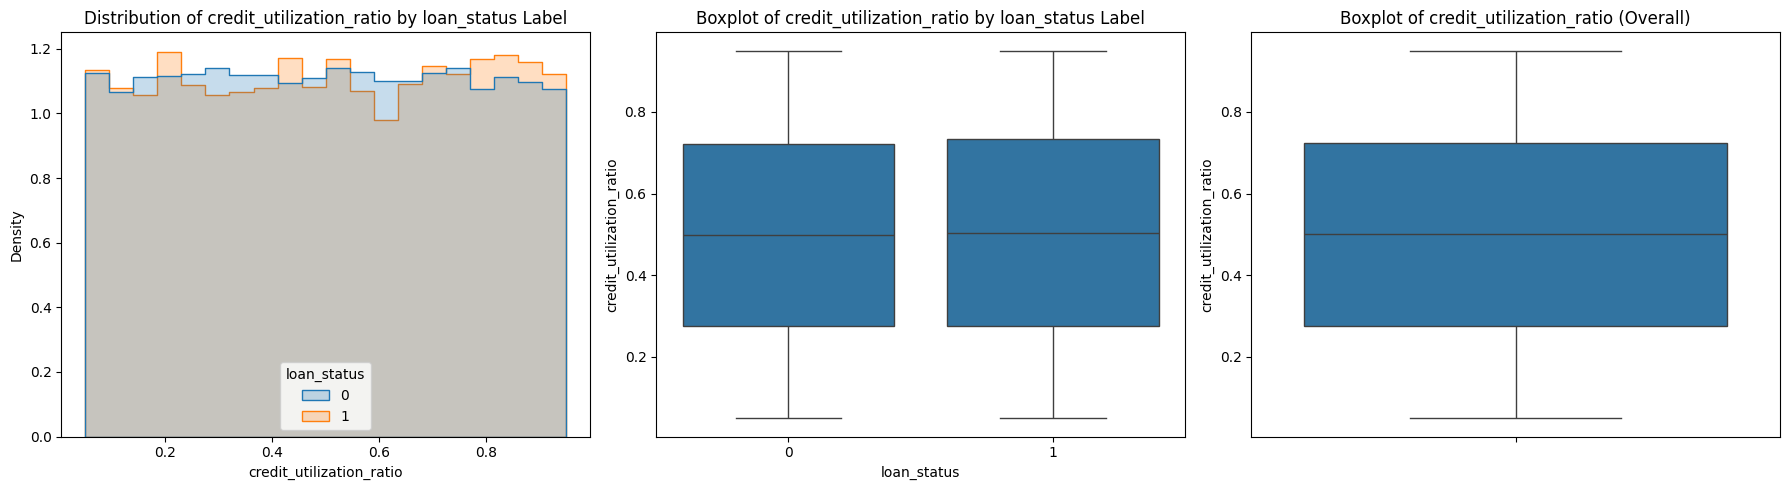

Distribution for credit_utilization_ratio:
  loan_status = 0: Skewness = 0.0038, Kurtosis = -1.1942
  loan_status = 1: Skewness = -0.0140, Kurtosis = -1.2152
-----------------------------------------


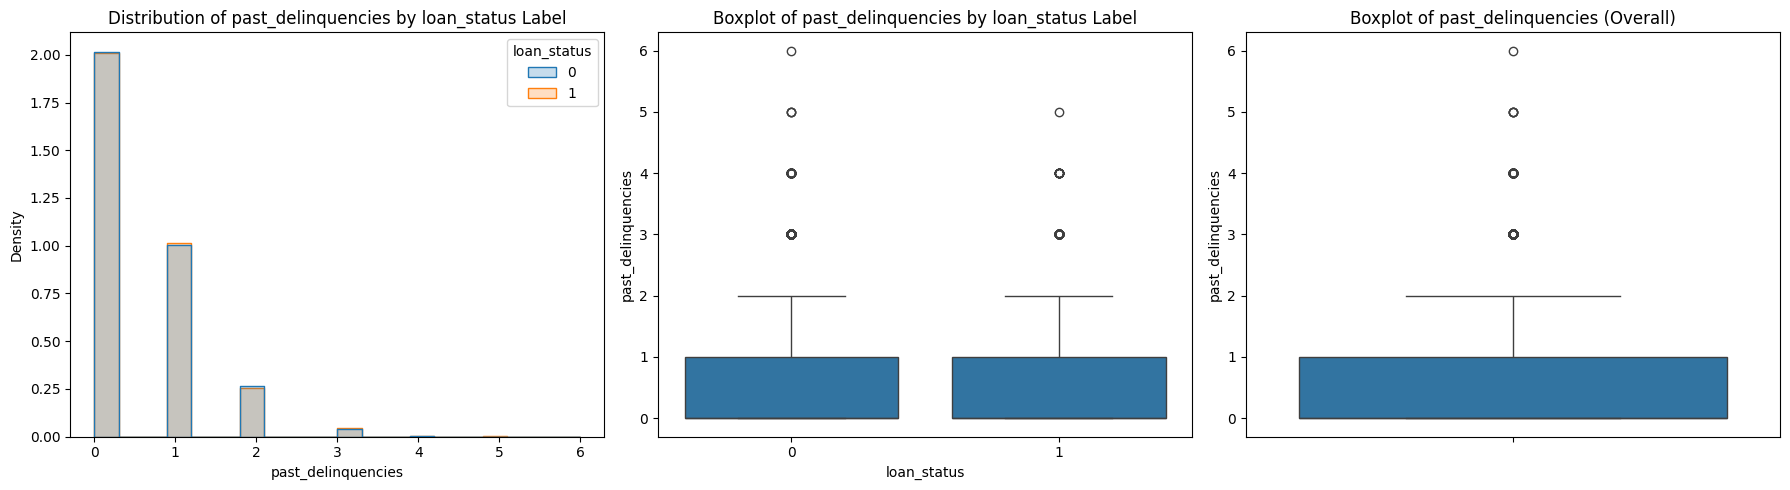

Distribution for past_delinquencies:
  loan_status = 0: Skewness = 1.3957, Kurtosis = 1.9111
  loan_status = 1: Skewness = 1.4035, Kurtosis = 1.9233
-----------------------------------------


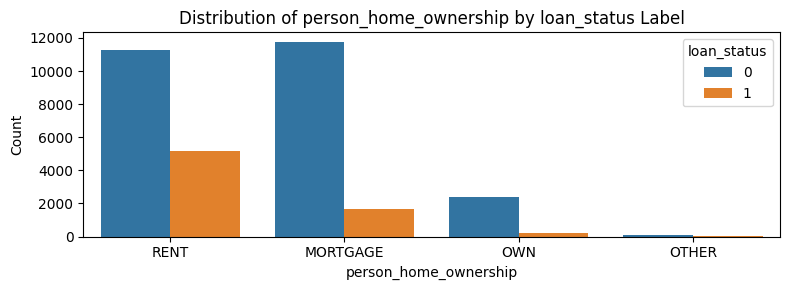


Overall distribution of person_home_ownership:
person_home_ownership
RENT        50.477389
MORTGAGE    41.261167
OWN          7.932951
OTHER        0.328493
Name: proportion, dtype: float64

Distribution of person_home_ownership for loan_status = 0:
person_home_ownership
MORTGAGE    46.142066
RENT        44.178741
OWN          9.388621
OTHER        0.290572
Name: proportion, dtype: float64

Distribution of person_home_ownership for loan_status = 1:
person_home_ownership
RENT        73.050943
MORTGAGE    23.768646
OWN          2.716015
OTHER        0.464396
Name: proportion, dtype: float64
--------------------------------------------


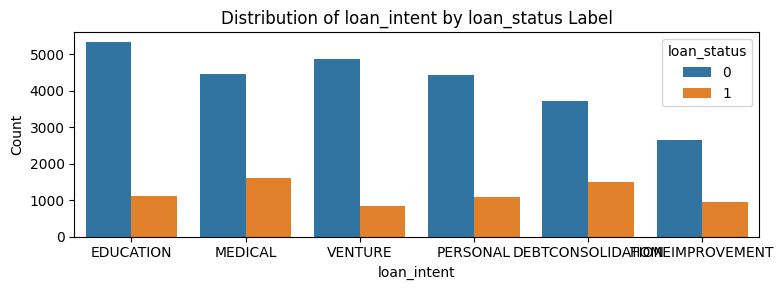


Overall distribution of loan_intent:
loan_intent
EDUCATION            19.804746
MEDICAL              18.638136
VENTURE              17.548276
PERSONAL             16.943481
DEBTCONSOLIDATION    15.997912
HOMEIMPROVEMENT      11.067449
Name: proportion, dtype: float64

Distribution of loan_intent for loan_status = 0:
loan_intent
EDUCATION            20.968312
VENTURE              19.118860
MEDICAL              17.473593
PERSONAL             17.363647
DEBTCONSOLIDATION    14.614992
HOMEIMPROVEMENT      10.460596
Name: proportion, dtype: float64

Distribution of loan_intent for loan_status = 1:
loan_intent
MEDICAL              22.811708
DEBTCONSOLIDATION    20.954123
EDUCATION            15.634675
PERSONAL             15.437658
HOMEIMPROVEMENT      13.242330
VENTURE              11.919505
Name: proportion, dtype: float64
--------------------------------------------


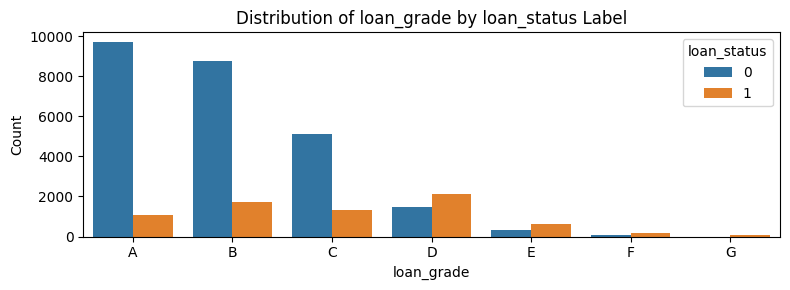


Overall distribution of loan_grade:
loan_grade
A    33.082614
B    32.075645
C    19.820096
D    11.128849
E     2.959506
F     0.739877
G     0.193412
Name: proportion, dtype: float64

Distribution of loan_grade for loan_status = 0:
loan_grade
A    38.100287
B    34.346409
C    20.092669
D     5.831076
E     1.346841
F     0.278792
G     0.003927
Name: proportion, dtype: float64

Distribution of loan_grade for loan_status = 1:
loan_grade
D    30.115395
B    23.937518
C    18.843231
A    15.099916
E     8.739094
F     2.392344
G     0.872502
Name: proportion, dtype: float64
--------------------------------------------


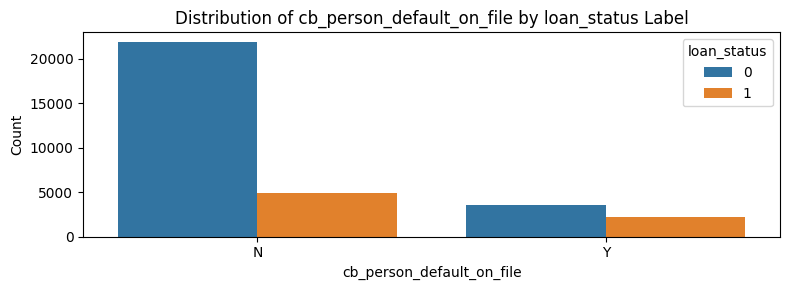


Overall distribution of cb_person_default_on_file:
cb_person_default_on_file
N    82.365763
Y    17.634237
Name: proportion, dtype: float64

Distribution of cb_person_default_on_file for loan_status = 0:
cb_person_default_on_file
N    85.970079
Y    14.029921
Name: proportion, dtype: float64

Distribution of cb_person_default_on_file for loan_status = 1:
cb_person_default_on_file
N    69.448354
Y    30.551646
Name: proportion, dtype: float64
--------------------------------------------


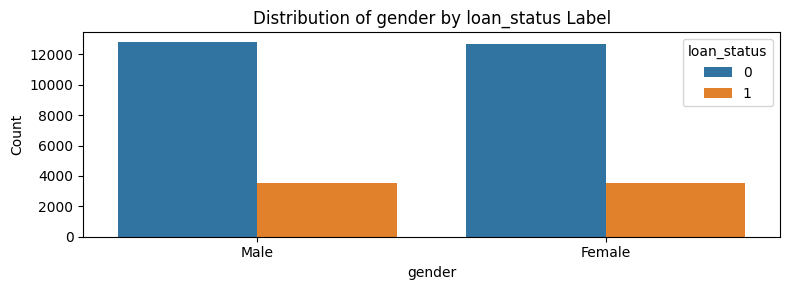


Overall distribution of gender:
gender
Male      50.240997
Female    49.759003
Name: proportion, dtype: float64

Distribution of gender for loan_status = 0:
gender
Male      50.276829
Female    49.723171
Name: proportion, dtype: float64

Distribution of gender for loan_status = 1:
gender
Male      50.112581
Female    49.887419
Name: proportion, dtype: float64
--------------------------------------------


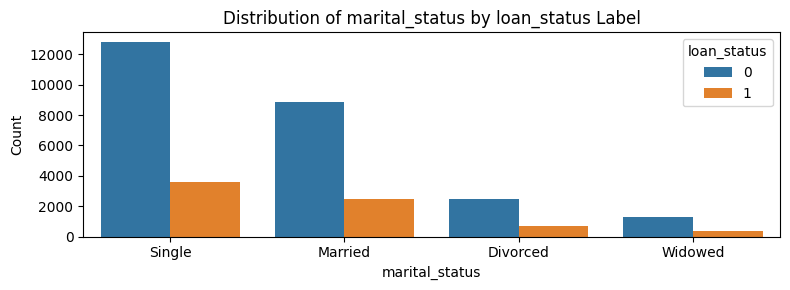


Overall distribution of marital_status:
marital_status
Single      50.237927
Married     34.967611
Divorced     9.738127
Widowed      5.056335
Name: proportion, dtype: float64

Distribution of marital_status for loan_status = 0:
marital_status
Single      50.268976
Married     34.907920
Divorced     9.738092
Widowed      5.085012
Name: proportion, dtype: float64

Distribution of marital_status for loan_status = 1:
marital_status
Single      50.126654
Married     35.181537
Divorced     9.738249
Widowed      4.953560
Name: proportion, dtype: float64
--------------------------------------------


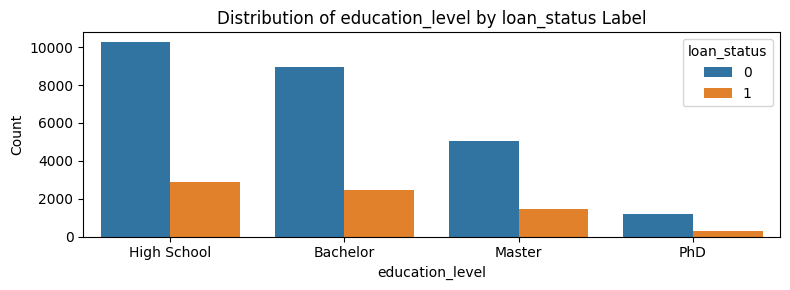


Overall distribution of education_level:
education_level
High School    40.462960
Bachelor       34.961471
Master         19.979738
PhD             4.595831
Name: proportion, dtype: float64

Distribution of education_level for loan_status = 0:
education_level
High School    40.334551
Bachelor       35.143519
Master         19.888483
PhD             4.633447
Name: proportion, dtype: float64

Distribution of education_level for loan_status = 1:
education_level
High School    40.923164
Bachelor       34.309035
Master         20.306783
PhD             4.461019
Name: proportion, dtype: float64
--------------------------------------------


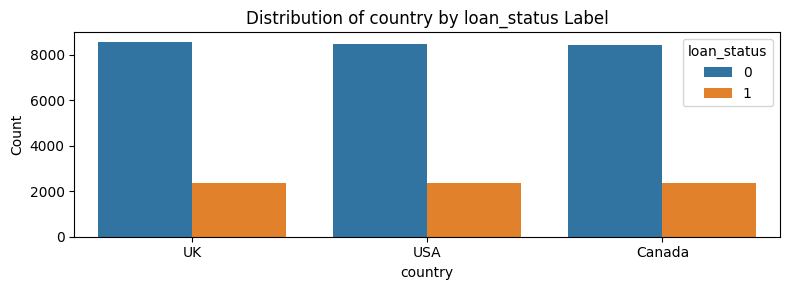


Overall distribution of country:
country
UK        33.592239
USA       33.306726
Canada    33.101035
Name: proportion, dtype: float64

Distribution of country for loan_status = 0:
country
UK        33.631759
USA       33.286214
Canada    33.082028
Name: proportion, dtype: float64

Distribution of country for loan_status = 1:
country
UK        33.450605
USA       33.380242
Canada    33.169153
Name: proportion, dtype: float64
--------------------------------------------


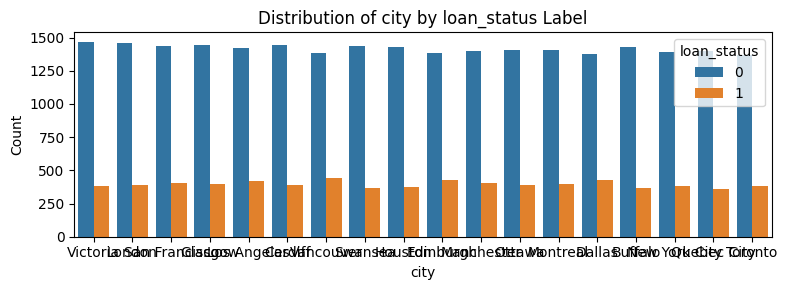


Overall distribution of city:
city
Victoria         5.682621
London           5.682621
San Francisco    5.651920
Glasgow          5.648850
Los Angeles      5.642710
Cardiff          5.621220
Vancouver        5.605870
Swansea          5.556749
Houston          5.556749
Edinburgh        5.547539
Manchester       5.535259
Ottawa           5.532189
Montreal         5.522979
Dallas           5.516839
Buffalo          5.510699
New York City    5.427808
Quebec City      5.384828
Toronto          5.372548
Name: proportion, dtype: float64

Distribution of city for loan_status = 0:
city
Victoria         5.756469
London           5.732909
Glasgow          5.670083
Cardiff          5.658303
Swansea          5.654376
San Francisco    5.650450
Houston          5.622963
Buffalo          5.599403
Los Angeles      5.567990
Ottawa           5.532650
Montreal         5.516943
Manchester       5.485530
Quebec City      5.477677
New York City    5.454117
Vancouver        5.434484
Edinburgh        5.430557

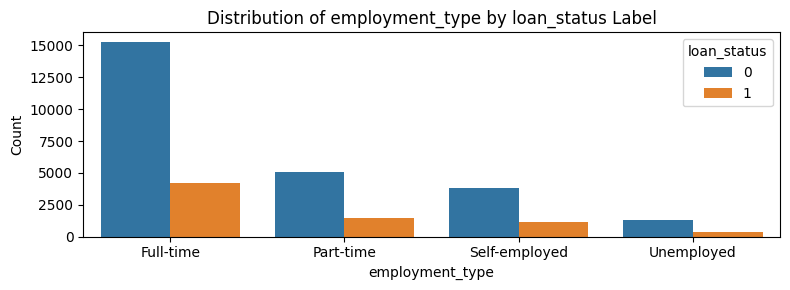


Overall distribution of employment_type:
employment_type
Full-time        59.770362
Part-time        19.979738
Self-employed    15.116815
Unemployed        5.133086
Name: proportion, dtype: float64

Distribution of employment_type for loan_status = 0:
employment_type
Full-time        59.956022
Part-time        19.978796
Self-employed    14.988024
Unemployed        5.077159
Name: proportion, dtype: float64

Distribution of employment_type for loan_status = 1:
employment_type
Full-time        59.104982
Part-time        19.983113
Self-employed    15.578384
Unemployed        5.333521
Name: proportion, dtype: float64
--------------------------------------------


In [ ]:

num_col = [
    'person_age', 'person_income', 'person_emp_length', 'loan_amnt',
    'loan_int_rate', 'cb_person_cred_hist_length', 'loan_term_months',
    'loan_to_income_ratio', 'other_debt', 'debt_to_income_ratio',
    'open_accounts', 'credit_utilization_ratio', 'past_delinquencies'
]

cat_col = [
    'person_home_ownership', 'loan_intent', 'loan_grade',
    'cb_person_default_on_file', 'gender', 'marital_status',
    'education_level', 'country', 'city', 'employment_type'
]


data_raw_for_analysis[num_col] = data_raw_for_analysis[num_col].apply(pd.to_numeric, errors='coerce')


target = 'loan_status'

def check_distribution(data, columns, target):
    for col in columns:
        plt.figure(figsize=(18, 5))

        # Histogram
        plt.subplot(1, 3, 1)
        sns.histplot(
            data=data, x=col, hue=target, kde=False,
            bins=20, element="step", stat="density", common_norm=False
        )
        plt.title(f'Distribution of {col} by {target} Label')

        # Boxplot per target
        plt.subplot(1, 3, 2)
        sns.boxplot(data=data, x=target, y=col)
        plt.title(f'Boxplot of {col} by {target} Label')

        # Boxplot overall
        plt.subplot(1, 3, 3)
        sns.boxplot(data=data, y=col)
        plt.title(f'Boxplot of {col} (Overall)')

        plt.tight_layout()
        plt.show()

        print(f'Distribution for {col}:')
        for label in sorted(data[target].dropna().unique()):
            subset = data[data[target] == label][col].dropna()
            skewness = subset.skew()
            kurtosis = subset.kurt()
            print(f"  {target} = {label}: Skewness = {skewness:.4f}, Kurtosis = {kurtosis:.4f}")

        print('-----------------------------------------')


def check_categorical_distribution(data, columns, target):
    for col in columns:
        plt.figure(figsize=(8, 3))

        sns.countplot(x=data[col], hue=data[target], order=data[col].value_counts().index)
        plt.title(f'Distribution of {col} by {target} Label')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.tight_layout()
        plt.show()

        print(f"\nOverall distribution of {col}:")
        print(data[col].value_counts(normalize=True) * 100)


        for label in sorted(data[target].dropna().unique()):
            subset = data[data[target] == label]
            print(f"\nDistribution of {col} for {target} = {label}:")
            print(subset[col].value_counts(normalize=True) * 100)

        print('--------------------------------------------')


check_distribution(data_raw_for_analysis, num_col, target)
check_categorical_distribution(data_raw_for_analysis, cat_col, target)



In [ ]:

# save_path = '/content/drive/My Drive/Colab Notebooks/iseng/DataDNA/September2025/data_final.csv'

# data_raw_for_analysis.to_csv(save_path, index=False)
# print(f"saved in: {save_path}")


In [ ]:
data_raw_for_analysis.head()

,client_ID,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length,gender,marital_status,education_level,country,state,city,city_latitude,city_longitude,employment_type,loan_term_months,loan_to_income_ratio,other_debt,debt_to_income_ratio,open_accounts,credit_utilization_ratio,past_delinquencies,cluster
0,CUST_00002,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2,Female,Divorced,Master,Canada,Ontario,Toronto,43.6532,-79.3832,Full-time,36,0.104167,1607.802794,0.271646,10,0.585436,3,1
1,CUST_00003,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3,Female,Married,Master,UK,Wales,Swansea,51.6214,-3.9436,Full-time,36,0.572917,2760.505633,0.860469,14,0.750732,0,0
2,CUST_00004,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,N,2,Male,Married,Bachelor,Canada,BC,Vancouver,49.2827,-123.1207,Part-time,12,0.534351,7155.286150,0.643592,15,0.379333,0,0
3,CUST_00005,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,Y,4,Female,Single,Bachelor,USA,New York,Buffalo,42.8864,-78.8784,Part-time,36,0.643382,15626.153439,0.930628,4,0.228103,0,0
4,CUST_00006,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,N,2,Male,Single,High School,USA,California,San Francisco,37.7749,-122.4194,Full-time,36,0.252525,2211.741134,0.475933,10,0.827034,0,1
